
# [주제] 위드 코로나 시대의 이동 수단 개선 방안 도출

**서울과학기술대학교 일반대학원 데이터사이언스학과  
21510004 이예빈, 21512023 정주현**

통합 데이터 설명 (월별 수집 데이터를 합쳐 연도별 통합 데이터 구축)

1.   승용차 - 서울시 교통량 조사 자료  
    일별, 시간별, 조사지점별 승용차 통행량  
    *   교통량 2019.xlsx : 2019.01.01~2019.12.31 수집
    *   교통량 2020.xlsx : 2020.01.01~2020.12.31 수집
    *   교통량 2021.xlsx : 2021.01.01~2021.09.30 수집

2.   지하철 - 서울교통공사 (1~8호선) 승차자료  
    일별, 시간별, 역별 지하철 이용객 수   
    *승차-하차 중복 관계가 존재하므로 승차 인원 자료만 사용*
    *   지하철 승하차인원 2019.xlsx : 2019.01.01~2019.12.31 수집
    *   지하철 승하차인원 2020.csv : 2020.01.01~2020.12.31 수집
    *   지하철 승하차인원 2021.xlsx : 2021.01.01~2021.10.31 수집

3.   버스 - 서울시 버스 정류장별 승하차 인원자료  
    - 일별, 노선별, 정류장별 승하차 총 인원 수 (시간대 X)  
      *승차-하차 중복 관계가 존재하므로 승차 인원 자료만 사용*
        *   버스 일별 2019.csv : 2019.01.01~2019.12.31 수집
        *   버스 일별 2020.csv : 2020.01.01~2020.12.31 수집
        *   버스 일별 2021.xlsx : 2021.01.01~2021.10.31 수집
    - 월별, 시간별, 노선별, 정류장별 버스 이용객 수 (날짜-월 단위로 합계 정보만 제공)  
      *승차-하차 중복 관계가 존재하므로 승차 인원 자료만 사용*
        *   버스 시간대별 2019.csv : 2019.01.01~2019.12.31 수집
        *   버스 시간대별 2020.csv : 2020.01.01~2020.12.31 수집
        *   버스 시간대별 2021.csv : 2021.01.01~2021.10.31 수집
4.   공공자전거 - 서울특별시 공공자전거 이용정보  
    일별, 시간별, 대여소별 이용 건수   
    *한 row = 하나의 이용 건에 대한 정보*
    *   대여이력 2019.xlsx : 2019.01.01~2019.12.31 수집
    *   대여이력 2020.csv : 2020.01.01~2020.12.31 수집
    *   대여이력 2021.xlsx : 2021.01.01~2021.06.30 수집


## 1: 날짜 기준 전처리 및 시각화

### 데이터 전처리


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
default_path = '/content/drive/Shareddrives/전자제조데이터분석_예빈,주현/통합데이터/'

In [ ]:
toexcel_path = '/content/drive/Shareddrives/전자제조데이터분석_예빈,주현/통합데이터3/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. 2021년의 수집기간을 기준으로 2019년, 2020년의 데이터 축소

##### 승용차

In [ ]:
# 데이터 불러오기
car2019 = pd.read_excel(default_path + '1. 승용차/교통량 2019.xlsx')
car2020 = pd.read_excel(default_path + '1. 승용차/교통량 2020.xlsx')
car2021 = pd.read_excel(default_path + '1. 승용차/교통량 2021.xlsx')

In [ ]:
# 일자: int64 -> datetime 형 변환

car2019['일자'] = car2019['일자'].astype('str')
car2019['일자'] = pd.to_datetime(car2019['일자'])

car2020['일자'] = car2020['일자'].astype('str')
car2020['일자'] = pd.to_datetime(car2020['일자'])

car2021['일자'] = car2021['일자'].astype('str')
car2021['일자'] = pd.to_datetime(car2021['일자'])

In [ ]:
car2019 = car2019[car2019['일자'].dt.month <=9]

In [ ]:
car2020 = car2020[car2020['일자'].dt.month <=9]

In [ ]:
car2019

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2019-01-01,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,NaN,693.0,479.0,401.0,309.0,400.0,504.0,615.0,840.0,916.0,1023.0,1308.0,1381.0,1427.0,1474.0,1498.0,1440.0,1372.0,1184.0,1019.0,895.0,877.0,749.0,546.0
1,2019-01-02,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,371.0,224.0,173.0,172.0,310.0,709.0,1705.0,2683.0,2580.0,2053.0,1825.0,1865.0,1773.0,1681.0,1695.0,1752.0,1849.0,2080.0,1989.0,1513.0,1233.0,1223.0,1157.0,904.0
2,2019-01-03,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,594.0,425.0,328.0,215.0,282.0,668.0,1557.0,2465.0,2645.0,2234.0,1886.0,1992.0,1882.0,1860.0,1980.0,2016.0,2028.0,2212.0,2131.0,1666.0,1396.0,1352.0,1224.0,982.0
3,2019-01-04,금,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,736.0,482.0,374.0,269.0,332.0,707.0,1440.0,2430.0,2580.0,2219.0,1925.0,2155.0,1839.0,1843.0,2051.0,2029.0,2106.0,2237.0,2051.0,1794.0,1433.0,1354.0,1297.0,992.0
4,2019-01-05,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,802.0,570.0,467.0,393.0,390.0,540.0,808.0,996.0,1373.0,1691.0,1807.0,2106.0,2067.0,1951.0,2007.0,1896.0,1893.0,2080.0,1819.0,1303.0,1146.0,1146.0,1090.0,745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73705,2019-09-26,목,서부간선도로,F-09,유출,목동교->신정교,2676.0,1883.0,1353.0,1076.0,1422.0,2728.0,3112.0,2463.0,1768.0,2521.0,2774.0,2792.0,3024.0,2950.0,2930.0,2994.0,3000.0,2483.0,2336.0,2801.0,2883.0,3217.0,3217.0,3179.0
73706,2019-09-27,금,서부간선도로,F-09,유출,목동교->신정교,2914.0,2085.0,1408.0,1136.0,1420.0,2655.0,3098.0,2636.0,2149.0,2633.0,2886.0,2746.0,3049.0,2972.0,2785.0,2585.0,2654.0,2050.0,1719.0,2281.0,2879.0,2957.0,3118.0,3150.0
73707,2019-09-28,토,서부간선도로,F-09,유출,목동교->신정교,3318.0,2669.0,2248.0,1800.0,1829.0,2505.0,2940.0,2990.0,3385.0,3121.0,2627.0,2813.0,2757.0,2497.0,2575.0,2522.0,2449.0,2568.0,2730.0,2921.0,2801.0,3009.0,3149.0,3143.0
73708,2019-09-29,일,서부간선도로,F-09,유출,목동교->신정교,2925.0,2391.0,1876.0,1356.0,1327.0,1623.0,2159.0,2447.0,3040.0,3224.0,2759.0,2968.0,2811.0,2720.0,2630.0,2956.0,2935.0,2927.0,2823.0,2946.0,3017.0,2940.0,3210.0,2856.0


In [ ]:
car2020

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020-01-01,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,712.0,645.0,437.0,309.0,290.0,338.0,504.0,574.0,853.0,826.0,1051.0,1302.0,1362.0,1376.0,1472.0,1416.0,1483.0,1329.0,1157.0,1014.0,954.0,849.0,780.0,480.0
1,2020-01-02,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,315.0,222.0,186.0,165.0,266.0,716.0,1561.0,2530.0,2524.0,2092.0,1904.0,1850.0,1730.0,1722.0,1792.0,1897.0,1842.0,2061.0,1994.0,1443.0,1233.0,1165.0,1094.0,852.0
2,2020-01-03,금,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,457.0,295.0,236.0,279.0,681.0,1385.0,2323.0,2544.0,2115.0,2018.0,2014.0,1693.0,1707.0,2004.0,1929.0,2049.0,2140.0,2178.0,1654.0,1356.0,1260.0,1253.0,941.0
3,2020-01-04,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,740.0,518.0,388.0,331.0,330.0,492.0,798.0,970.0,1369.0,1639.0,1828.0,2025.0,1899.0,1876.0,1837.0,1788.0,1588.0,1669.0,1530.0,1222.0,1143.0,1089.0,1039.0,791.0
4,2020-01-05,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,533.0,424.0,297.0,230.0,209.0,302.0,525.0,731.0,1098.0,1434.0,1578.0,1567.0,1605.0,1679.0,1634.0,1673.0,1494.0,1429.0,1288.0,1035.0,987.0,884.0,803.0,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73975,2020-09-26,토,서부간선도로,F-09,유출,목동교->신정교,2949.0,2268.0,1754.0,1401.0,1658.0,2439.0,2679.0,2987.0,3072.0,3144.0,2755.0,2673.0,2156.0,2437.0,2597.0,2510.0,2671.0,2558.0,2718.0,2774.0,2781.0,2954.0,3087.0,2812.0
73976,2020-09-27,일,서부간선도로,F-09,유출,목동교->신정교,2408.0,1788.0,1251.0,994.0,1111.0,1522.0,1911.0,2216.0,2729.0,3004.0,2450.0,2646.0,2939.0,2602.0,2936.0,2908.0,2447.0,2773.0,2735.0,2921.0,2862.0,3054.0,2924.0,2301.0
73977,2020-09-28,월,서부간선도로,F-09,유출,목동교->신정교,1633.0,1097.0,794.0,789.0,1529.0,2711.0,3145.0,2108.0,2332.0,2216.0,2672.0,2724.0,2592.0,2551.0,2430.0,2340.0,2130.0,1775.0,1560.0,1909.0,2780.0,3010.0,3132.0,3024.0
73978,2020-09-29,화,서부간선도로,F-09,유출,목동교->신정교,2569.0,1675.0,1166.0,957.0,1288.0,2449.0,2969.0,2517.0,2102.0,2380.0,2685.0,2242.0,2864.0,2893.0,2415.0,2076.0,1853.0,1706.0,1638.0,1965.0,2596.0,2982.0,2985.0,3193.0


In [ ]:
car2021

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2021-01-01,금,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,297.0,274.0,150.0,110.0,143.0,226.0,344.0,464.0,546.0,624.0,699.0,938.0,996.0,1004.0,1128.0,1181.0,1100.0,1030.0,860.0,731.0,685.0,692.0,458.0,304.0
1,2021-01-02,토,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,189.0,135.0,103.0,90.0,130.0,279.0,465.0,601.0,790.0,972.0,1199.0,1384.0,1325.0,1422.0,1547.0,1476.0,1465.0,1349.0,1071.0,858.0,794.0,762.0,514.0,387.0
2,2021-01-03,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,258.0,146.0,107.0,84.0,101.0,203.0,363.0,437.0,629.0,737.0,923.0,998.0,1075.0,1180.0,1180.0,1254.0,1113.0,1110.0,960.0,704.0,718.0,650.0,489.0,338.0
3,2021-01-04,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,209.0,98.0,116.0,97.0,224.0,638.0,1607.0,2526.0,2615.0,2145.0,1819.0,1669.0,1474.0,1609.0,1675.0,1714.0,1693.0,1833.0,1612.0,1353.0,1091.0,993.0,710.0,507.0
4,2021-01-05,화,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,296.0,209.0,150.0,143.0,218.0,525.0,1374.0,2346.0,2545.0,2117.0,1928.0,1869.0,1602.0,1591.0,1674.0,1720.0,1700.0,1866.0,1767.0,1339.0,1074.0,1050.0,799.0,552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73705,2021-09-26,일,서부간선도로,F-09,유출,목동교->신정교,1570.0,1096.0,789.0,631.0,666.0,978.0,1213.0,1571.0,2019.0,2210.0,2466.0,2421.0,2465.0,2585.0,2437.0,2596.0,2705.0,2605.0,2562.0,2859.0,2781.0,2873.0,2608.0,1893.0
73706,2021-09-27,월,서부간선도로,F-09,유출,목동교->신정교,1229.0,829.0,591.0,664.0,1425.0,1995.0,2548.0,2204.0,2024.0,2178.0,2670.0,2714.0,2533.0,2637.0,2604.0,2644.0,2408.0,2125.0,2120.0,2245.0,2616.0,2687.0,2628.0,1944.0
73707,2021-09-28,화,서부간선도로,F-09,유출,목동교->신정교,1317.0,868.0,667.0,651.0,1126.0,2122.0,2573.0,2226.0,1781.0,2070.0,2482.0,2568.0,2559.0,2682.0,2523.0,2379.0,2458.0,2070.0,1922.0,2256.0,2568.0,2226.0,2339.0,1843.0
73708,2021-09-29,수,서부간선도로,F-09,유출,목동교->신정교,1191.0,811.0,621.0,598.0,935.0,1766.0,2697.0,2320.0,1771.0,1694.0,2053.0,2455.0,2411.0,2614.0,2516.0,2577.0,2377.0,2116.0,2238.0,2413.0,2446.0,2719.0,2688.0,1932.0


In [ ]:
car2019.to_excel(toexcel_path + '1. 승용차/교통량 2019.xlsx',index=False)
car2020.to_excel(toexcel_path + '1. 승용차/교통량 2020.xlsx',index=False)
car2021.to_excel(toexcel_path + '1. 승용차/교통량 2021.xlsx',index=False)

##### 지하철

In [ ]:
# 데이터 불러오기
sub2019 = pd.read_excel(default_path + '2. 지하철/지하철 승하차인원 2019.xlsx')
sub2020 = pd.read_csv(default_path + '2. 지하철/지하철 승하차인원 2020.csv', encoding='cp949')
# sub2021 = pd.read_excel(default_path + '2. 지하철/지하철 승하차인원 2021.xlsx')

In [ ]:
sub2020['날짜'] = pd.to_datetime(sub2020['날짜'])

In [ ]:
sub2019 = sub2019[sub2019['날짜'].dt.month <=10]
sub2020 = sub2020[sub2020['날짜'].dt.month <=10]
# sub2021 = sub2021[sub2021['날짜'].dt.month <=10]

In [ ]:
sub2020

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,10:00 ~ 11:00,11:00 ~ 12:00,12:00 ~ 13:00,13:00 ~ 14:00,14:00 ~ 15:00,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,1418,2288,2463,2718,2065,2972,3194,3342,3002,2857,2311,2523,1830,987,25
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,1655,2047,2484,2248,2308,2286,2354,2261,1922,1696,1620,1181,768,426,77
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,309,442,582,623,763,873,1019,1234,1383,1271,1061,991,572,217,2
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,612,822,948,917,1021,885,783,849,602,435,293,273,174,149,26
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,379,666,918,1056,1190,1636,1748,1890,1879,1827,1955,1800,1259,406,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168429,2020-10-31,8호선,2825,신흥,하차,25,99,56,119,156,162,194,243,302,255,281,310,381,400,275,211,249,200,142,26
168430,2020-10-31,8호선,2826,수진,승차,119,143,215,322,320,280,352,377,325,263,266,366,333,258,161,96,75,56,19,0
168431,2020-10-31,8호선,2826,수진,하차,9,68,90,188,154,166,222,239,331,306,280,249,262,279,202,150,233,192,136,27
168432,2020-10-31,8호선,2827,모란,승차,70,88,99,148,208,223,225,271,283,250,295,271,312,247,156,131,125,132,70,0


In [ ]:
sub2019.to_excel(toexcel_path + '2. 지하철/지하철 승하차인원 2019.xlsx',index=False)
sub2020.to_csv(toexcel_path + '2. 지하철/지하철 승하차인원 2020.csv', encoding='cp949',index=False)
# sub2021.to_excel(toexcel_path + '2. 지하철/지하철 승하차인원 2021.xlsx',index=False)

##### 버스

In [ ]:
# 데이터 불러오기
busday2019 = pd.read_csv(default_path + '3. 버스/버스 일별 2019.csv', encoding='cp949')
busday2020 = pd.read_csv(default_path + '3. 버스/버스 일별 2020.csv', encoding='cp949')
# busday2021 = pd.read_csv(default_path + '3. 버스/버스 일별 2021.csv', encoding='cp949')
bustime2019 = pd.read_csv(default_path + '3. 버스/버스 시간대별 2019.csv', encoding='cp949')
bustime2020 = pd.read_csv(default_path + '3. 버스/버스 시간대별 2020.csv', encoding='cp949')
# bustime2021 = pd.read_excel(default_path + '3. 버스/버스 시간대별 2021.xlsx')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 사용일자: int64 -> datetime 형 변환

busday2019['사용일자'] = busday2019['사용일자'].astype('str')
busday2019['사용일자'] = pd.to_datetime(busday2019['사용일자'])

busday2020['사용일자'] = busday2020['사용일자'].astype('str')
busday2020['사용일자'] = pd.to_datetime(busday2020['사용일자'])

# busday2021['사용일자'] = busday2021['사용일자'].astype('str')
# busday2021['사용일자'] = pd.to_datetime(busday2021['사용일자'])

In [ ]:
busday2019 = busday2019[busday2019['사용일자'].dt.month <=10]
busday2020 = busday2020[busday2020['사용일자'].dt.month <=10]
# busday2021 = busday2021[busday2021['사용일자'].dt.month <=10]

In [ ]:
busday2019.to_csv(toexcel_path + '3. 버스/버스 일별 2019.csv', encoding='cp949', index=False)
busday2020.to_csv(toexcel_path + '3. 버스/버스 일별 2020.csv', encoding='cp949', index=False)
# busday2021.to_csv(toexcel_path + '3. 버스/버스 일별 2021.csv', encoding='cp949', index=False)

In [ ]:
bustime2019 = bustime2019[bustime2019['사용년월']<=201910]
bustime2020 = bustime2020[bustime2020['사용년월']<=202010]
# bustime2021 = bustime2021[bustime2021['사용년월']<=202110]

In [ ]:
bustime2019.to_csv(toexcel_path + '3. 버스/버스 시간대별 2019.csv', encoding='cp949', index=False)
bustime2020.to_csv(toexcel_path + '3. 버스/버스 시간대별 2020.csv', encoding='cp949', index=False)
# bustime2021.to_excel(toexcel_path + '3. 버스/버스 시간대별 2021.xlsx', index=False)

##### 공공자전거

In [ ]:
# 데이터 불러오기
bic2019 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2019.csv', encoding='utf-8')
bic2020 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2020.csv', encoding='utf-8')
bic2021 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2021.csv', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
bic2019['대여일자'] = pd.to_datetime(bic2019['대여일자'])
bic2020['대여일자'] = pd.to_datetime(bic2020['대여일자'])
bic2021['대여일자'] = pd.to_datetime(bic2021['대여일자'])

In [ ]:
bic2019 = bic2019[bic2019['대여일자'].dt.month <=6]
bic2020 = bic2020[bic2020['대여일자'].dt.month <=6]
bic2021 = bic2021[bic2021['대여일자'].dt.month <=6]

In [ ]:
bic2021

,대여일자,대여시간,대여소번호,이용건수,이동거리,사용시간
0,2021-01-01,0,1347,2,992.78,13.0
1,2021-01-01,0,1349,1,1127.50,10.0
2,2021-01-01,0,1168,1,0.00,7.0
3,2021-01-01,0,2619,1,1658.34,14.0
4,2021-01-01,0,536,1,743.88,5.0
...,...,...,...,...,...,...
11118850,2021-06-30,23,1640,1,176.14,14.0
11118851,2021-06-30,23,250,1,0.00,8.0
11118852,2021-06-30,23,1195,1,2258.09,17.0
11118853,2021-06-30,23,372,1,797.66,14.0


In [ ]:
bic2019.to_csv(toexcel_path + '4. 공공자전거/대여이력 2019.csv', encoding='utf-8', index=False)
bic2020.to_csv(toexcel_path + '4. 공공자전거/대여이력 2020.csv', encoding='utf-8', index=False)
bic2021.to_csv(toexcel_path + '4. 공공자전거/대여이력 2021.csv', encoding='utf-8', index=False)

#### 2. 날짜 기준 데이터 분리



*   전체 시간대, 평일 전체 시간대, 평일 출퇴근 시간대, 주말 전체 시간대로 구분
    * 출퇴근 시간은 버스 전용 차로 운행 시간을 기준으로 구분 (출근: 07시&#126;10시, 퇴근: 17시&#126;20시)

*   groupby를 통해 일별 평균, 합계를 구하여 사용
    * 승용차는 관측소의 문제로 결측치가 존재하므로 평균 사용, 나머지는 합계 사용
    * 버스, 지하철은 승차와 하차 정보가 함께 존재하므로 승차 자료만 사용



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
default_path = '/content/drive/Shareddrives/전자제조데이터분석_예빈,주현/통합데이터3/'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 각 연도의 평일과 주말(공휴일, 대체공휴일 포함)을 분리하는 함수
def hol_week_19(df19):
    df19_hol = df19[((df19.iloc[:,0].dt.month==1) & (df19.iloc[:,0].dt.day==1)) | ((df19.iloc[:,0].dt.month==2) & (df19.iloc[:,0].dt.day==4))
                | ((df19.iloc[:,0].dt.month==2) & (df19.iloc[:,0].dt.day==5)) | ((df19.iloc[:,0].dt.month==2) & (df19.iloc[:,0].dt.day==6))
                | ((df19.iloc[:,0].dt.month==3) & (df19.iloc[:,0].dt.day==1)) | ((df19.iloc[:,0].dt.month==6) & (df19.iloc[:,0].dt.day==6))
                | ((df19.iloc[:,0].dt.month==8) & (df19.iloc[:,0].dt.day==15)) | ((df19.iloc[:,0].dt.month==9) & (df19.iloc[:,0].dt.day==12))
                | ((df19.iloc[:,0].dt.month==9) & (df19.iloc[:,0].dt.day==13)) | ((df19.iloc[:,0].dt.month==10) & (df19.iloc[:,0].dt.day==3))
                | ((df19.iloc[:,0].dt.month==10) & (df19.iloc[:,0].dt.day==9)) | ((df19.iloc[:,0].dt.month==12) & (df19.iloc[:,0].dt.day==25)) | (df19.iloc[:,0].dt.weekday>=5)]
    
    df19_wek = df19.drop(df19_hol.index)
    
    return df19_hol, df19_wek

def hol_week_20(df20):
    df20_hol = df20[((df20.iloc[:,0].dt.month==1) & (df20.iloc[:,0].dt.day==1)) | ((df20.iloc[:,0].dt.month==1) & (df20.iloc[:,0].dt.day==24)) 
     | ((df20.iloc[:,0].dt.month==1) & (df20.iloc[:,0].dt.day==27)) | ((df20.iloc[:,0].dt.month==4) & (df20.iloc[:,0].dt.day==30)) 
     | ((df20.iloc[:,0].dt.month==5) & (df20.iloc[:,0].dt.day==5)) | ((df20.iloc[:,0].dt.month==8) & (df20.iloc[:,0].dt.day==17)) 
     | ((df20.iloc[:,0].dt.month==9) & (df20.iloc[:,0].dt.day==30)) | ((df20.iloc[:,0].dt.month==10) & (df20.iloc[:,0].dt.day==1)) 
     | ((df20.iloc[:,0].dt.month==10) & (df20.iloc[:,0].dt.day==2)) | ((df20.iloc[:,0].dt.month==10) & (df20.iloc[:,0].dt.day==9)) 
     | ((df20.iloc[:,0].dt.month==12) & (df20.iloc[:,0].dt.day==25)) | (df20.iloc[:,0].dt.weekday>=5)]
    
    df20_wek = df20.drop(df20_hol.index)
    
    return df20_hol, df20_wek

def hol_week_21(df21):
    df21_hol = df21[((df21.iloc[:,0].dt.month==1) & (df21.iloc[:,0].dt.day==1)) | ((df21.iloc[:,0].dt.month==2) & (df21.iloc[:,0].dt.day==11)) 
     | ((df21.iloc[:,0].dt.month==2) & (df21.iloc[:,0].dt.day==12)) | ((df21.iloc[:,0].dt.month==3) & (df21.iloc[:,0].dt.day==1)) 
     | ((df21.iloc[:,0].dt.month==5) & (df21.iloc[:,0].dt.day==5)) | ((df21.iloc[:,0].dt.month==5) & (df21.iloc[:,0].dt.day==19)) 
     | ((df21.iloc[:,0].dt.month==8) & (df21.iloc[:,0].dt.day==16)) | ((df21.iloc[:,0].dt.month==9) & (df21.iloc[:,0].dt.day==20)) 
     | ((df21.iloc[:,0].dt.month==9) & (df21.iloc[:,0].dt.day==21)) | ((df21.iloc[:,0].dt.month==9) & (df21.iloc[:,0].dt.day==22)) 
     | ((df21.iloc[:,0].dt.month==10) & (df21.iloc[:,0].dt.day==4)) | ((df21.iloc[:,0].dt.month==10) & (df21.iloc[:,0].dt.day==11)) |(df21.iloc[:,0].dt.weekday>=5)]
    
    df21_week = df21.drop(df21_hol.index)
    
    return df21_hol, df21_week

##### 승용차

In [ ]:
# 데이터 불러오기
car2019 = pd.read_excel(default_path + '1. 승용차/교통량 2019' + '.xlsx')
car2020 = pd.read_excel(default_path + '1. 승용차/교통량 2020' + '.xlsx')
car2021 = pd.read_excel(default_path + '1. 승용차/교통량 2021' + '.xlsx')

In [ ]:
# groupby 함수 이용 전체 데이터 일별 평균 구하기 (날짜 구분X)
gb_car2019 = car2019.groupby(by = ['일자'], as_index = False).mean()
gb_car2020 = car2020.groupby(by = ['일자'], as_index = False).mean()
gb_car2021 = car2021.groupby(by = ['일자'], as_index = False).mean()

In [ ]:
car_byday_2019 = pd.DataFrame({'일자' : gb_car2019['일자'],'합계' : gb_car2019.mean(axis=1, numeric_only=True)})
car_byday_2020 = pd.DataFrame({'일자' : gb_car2020['일자'],'합계' : gb_car2020.mean(axis=1, numeric_only=True)})
car_byday_2021 = pd.DataFrame({'일자' : gb_car2021['일자'],'합계' : gb_car2021.mean(axis=1, numeric_only=True)})

In [ ]:
# csv형식으로 저장
car_byday_2019.to_csv(default_path + '1. 승용차/전체 교통량 2019 일별평균.csv', index=False, encoding='cp949')
car_byday_2020.to_csv(default_path + '1. 승용차/전체 교통량 2020 일별평균.csv', index=False, encoding='cp949')
car_byday_2021.to_csv(default_path + '1. 승용차/전체 교통량 2021 일별평균.csv', index=False, encoding='cp949')

In [ ]:
# 날짜 구분 함수 이용 -> 평일과 주말,공휴일 구분
car2019_hol, car2019_week = hol_week_19(car2019)
car2020_hol, car2020_week = hol_week_20(car2020)
car2021_hol, car2021_week = hol_week_21(car2021)

In [ ]:
# groupby 함수 이용 -> 일별 평균 구하기
gb_car2019_hol = car2019_hol.groupby(by = ['일자'], as_index = False).mean()
gb_car2020_hol = car2020_hol.groupby(by = ['일자'], as_index = False).mean()
gb_car2021_hol = car2021_hol.groupby(by = ['일자'], as_index = False).mean()

gb_car2019_week = car2019_week.groupby(by = ['일자'], as_index = False).mean()
gb_car2020_week = car2020_week.groupby(by = ['일자'], as_index = False).mean()
gb_car2021_week = car2021_week.groupby(by = ['일자'], as_index = False).mean()

In [ ]:
car_byday_2019_hol = pd.DataFrame({'일자' : gb_car2019_hol['일자'],'합계' : gb_car2019_hol.mean(axis=1, numeric_only=True)})
car_byday_2020_hol = pd.DataFrame({'일자' : gb_car2020_hol['일자'],'합계' : gb_car2020_hol.mean(axis=1, numeric_only=True)})
car_byday_2021_hol = pd.DataFrame({'일자' : gb_car2021_hol['일자'],'합계' : gb_car2021_hol.mean(axis=1, numeric_only=True)})

car_byday_2019_week = pd.DataFrame({'일자' : gb_car2019_week['일자'],'합계' : gb_car2019_week.mean(axis=1, numeric_only=True)})
car_byday_2020_week = pd.DataFrame({'일자' : gb_car2020_week['일자'],'합계' : gb_car2020_week.mean(axis=1, numeric_only=True)})
car_byday_2021_week = pd.DataFrame({'일자' : gb_car2021_week['일자'],'합계' : gb_car2021_week.mean(axis=1, numeric_only=True)})

In [ ]:
# 시간으로 평일 출퇴근 구분
gb_car2019_week_com = gb_car2019_week[['일자','7시','8시','9시','10시','17시','18시','19시','20시']]
gb_car2020_week_com = gb_car2020_week[['일자','7시','8시','9시','10시','17시','18시','19시','20시']]
gb_car2021_week_com = gb_car2021_week[['일자','7시','8시','9시','10시','17시','18시','19시','20시']]

In [ ]:
car_byday_2019_week_com = pd.DataFrame({'일자' : gb_car2019_week_com['일자'],'합계' : gb_car2019_week_com.mean(axis=1, numeric_only=True)})
car_byday_2020_week_com = pd.DataFrame({'일자' : gb_car2020_week_com['일자'],'합계' : gb_car2020_week_com.mean(axis=1, numeric_only=True)})
car_byday_2021_week_com = pd.DataFrame({'일자' : gb_car2021_week_com['일자'],'합계' : gb_car2021_week_com.mean(axis=1, numeric_only=True)})

In [ ]:
# csv형식으로 저장
car_byday_2019_hol.to_csv(default_path + '1. 승용차/주말 교통량 2019 일별평균.csv', index=False, encoding='cp949')
car_byday_2020_hol.to_csv(default_path + '1. 승용차/주말 교통량 2020 일별평균.csv', index=False, encoding='cp949')
car_byday_2021_hol.to_csv(default_path + '1. 승용차/주말 교통량 2021 일별평균.csv', index=False, encoding='cp949')

car_byday_2019_week.to_csv(default_path + '1. 승용차/주중 교통량 2019 일별평균.csv', index=False, encoding='cp949')
car_byday_2020_week.to_csv(default_path + '1. 승용차/주중 교통량 2020 일별평균.csv', index=False, encoding='cp949')
car_byday_2021_week.to_csv(default_path + '1. 승용차/주중 교통량 2021 일별평균.csv', index=False, encoding='cp949')

car_byday_2019_week_com.to_csv(default_path + '1. 승용차/출퇴근 주중 교통량 2019 일별평균.csv', index=False, encoding='cp949')
car_byday_2020_week_com.to_csv(default_path + '1. 승용차/출퇴근 주중 교통량 2020 일별평균.csv', index=False, encoding='cp949')
car_byday_2021_week_com.to_csv(default_path + '1. 승용차/출퇴근 주중 교통량 2021 일별평균.csv', index=False, encoding='cp949')

##### 지하철

In [ ]:
# 데이터 불러오기
sub2019 = pd.read_excel(default_path + '2. 지하철/지하철 승하차인원 2019.xlsx')
sub2020 = pd.read_csv(default_path + '2. 지하철/지하철 승하차인원 2020.csv', encoding='cp949')
sub2021 = pd.read_excel(default_path + '2. 지하철/지하철 승하차인원 2021.xlsx')

In [ ]:
# 승차 자료만 사용
ride_sub2019 = sub2019.loc[sub2019['구분'] == '승차', :]
ride_sub2020 = sub2020.loc[sub2020['구분'] == '승차', :]
ride_sub2021 = sub2021.loc[sub2021['구분'] == '승차', :]

In [ ]:
ride_sub2021.columns

Index(['날짜', '호선', '역번호', '역명', '구분', '6시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09',
       '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', '14 ~ 15',
       '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21',
       '21 ~ 22', '22 ~ 23', '23시 이후', '합 계'],
      dtype='object')

In [ ]:
# 컬럼 이름 변경
ride_sub2019.columns = ['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', 
                        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후', '합계']
ride_sub2020.columns = ['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', 
                        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후']
ride_sub2021.columns = ['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', 
                        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23시 이후', '합계']

In [ ]:
# '역번호' 컬럼 drop
ride_sub2019 = ride_sub2019.drop('역번호', axis = 1)
ride_sub2020 = ride_sub2020.drop('역번호', axis = 1)
ride_sub2021 = ride_sub2021.drop('역번호', axis = 1)

In [ ]:
# '합계' 컬럼 drop
ride_sub2019 = ride_sub2019.drop('합계', axis = 1)
ride_sub2021 = ride_sub2021.drop('합계', axis = 1)

In [ ]:
# ride_sub2020는 csv로 불러서 그런지 '날짜' column type을 object로 인식, type을 datetime으로 변경해줌
ride_sub2020['날짜'] = pd.to_datetime(ride_sub2020['날짜'])

In [ ]:
# group by 함수 이용 전체 데이터 일별 합계 구하기 (날짜 구분X)
gb_sub2019 = ride_sub2019.groupby(by = ['날짜'], as_index = False).sum()
gb_sub2020 = ride_sub2020.groupby(by = ['날짜'], as_index = False).sum()
gb_sub2021 = ride_sub2021.groupby(by = ['날짜'], as_index = False).sum()

In [ ]:
sub_byday_2019 = pd.DataFrame({'날짜' : gb_sub2019['날짜'],'합계' : gb_sub2019.sum(axis=1, numeric_only=True)})
sub_byday_2020 = pd.DataFrame({'날짜' : gb_sub2020['날짜'],'합계' : gb_sub2020.sum(axis=1, numeric_only=True)})
sub_byday_2021 = pd.DataFrame({'날짜' : gb_sub2021['날짜'],'합계' : gb_sub2021.sum(axis=1, numeric_only=True)})

In [ ]:
# csv형식으로 저장
sub_byday_2019.to_csv(default_path + '2. 지하철/전체 지하철 승차인원 2019 일별합계.csv', index=False, encoding='cp949')
sub_byday_2020.to_csv(default_path + '2. 지하철/전체 지하철 승차인원 2020 일별합계.csv', index=False, encoding='cp949')
sub_byday_2021.to_csv(default_path + '2. 지하철/전체 지하철 승차인원 2021 일별합계.csv', index=False, encoding='cp949')

In [ ]:
# 날짜 구분 함수 이용 -> 평일과 주말,공휴일 구분
ride_sub2019_hol, ride_sub2019_week = hol_week_19(ride_sub2019)
ride_sub2020_hol, ride_sub2020_week = hol_week_20(ride_sub2020)
ride_sub2021_hol, ride_sub2021_week = hol_week_21(ride_sub2021)

In [ ]:
# groupby 함수 이용 -> 일별 합계 구하기
gb_sub2019_hol = ride_sub2019_hol.groupby(by = ['날짜'], as_index = False).sum()
gb_sub2020_hol = ride_sub2020_hol.groupby(by = ['날짜'], as_index = False).sum()
gb_sub2021_hol = ride_sub2021_hol.groupby(by = ['날짜'], as_index = False).sum()

gb_sub2019_week = ride_sub2019_week.groupby(by = ['날짜'], as_index = False).sum()
gb_sub2020_week = ride_sub2020_week.groupby(by = ['날짜'], as_index = False).sum()
gb_sub2021_week = ride_sub2021_week.groupby(by = ['날짜'], as_index = False).sum()

In [ ]:
sub_byday_2019_hol = pd.DataFrame({'날짜' : gb_sub2019_hol['날짜'],'합계' : gb_sub2019_hol.sum(axis=1, numeric_only=True)})
sub_byday_2020_hol = pd.DataFrame({'날짜' : gb_sub2020_hol['날짜'],'합계' : gb_sub2020_hol.sum(axis=1, numeric_only=True)})
sub_byday_2021_hol = pd.DataFrame({'날짜' : gb_sub2021_hol['날짜'],'합계' : gb_sub2021_hol.sum(axis=1, numeric_only=True)})

sub_byday_2019_week = pd.DataFrame({'날짜' : gb_sub2019_week['날짜'],'합계' : gb_sub2019_week.sum(axis=1, numeric_only=True)})
sub_byday_2020_week = pd.DataFrame({'날짜' : gb_sub2020_week['날짜'],'합계' : gb_sub2020_week.sum(axis=1, numeric_only=True)})
sub_byday_2021_week = pd.DataFrame({'날짜' : gb_sub2021_week['날짜'],'합계' : gb_sub2021_week.sum(axis=1, numeric_only=True)})

In [ ]:
# 시간으로 평일 출퇴근 구분
gb_sub2019_week_com = gb_sub2019_week[['날짜','07 ~ 08', '08 ~ 09', '09 ~ 10','17 ~ 18', '18 ~ 19', '19 ~ 20']]
gb_sub2020_week_com = gb_sub2020_week[['날짜','07 ~ 08', '08 ~ 09', '09 ~ 10','17 ~ 18', '18 ~ 19', '19 ~ 20']]
gb_sub2021_week_com = gb_sub2021_week[['날짜','07 ~ 08', '08 ~ 09', '09 ~ 10','17 ~ 18', '18 ~ 19', '19 ~ 20']]

In [ ]:
sub_byday_2019_week_com = pd.DataFrame({'날짜' : gb_sub2019_week_com['날짜'],'합계' : gb_sub2019_week_com.sum(axis=1, numeric_only=True)})
sub_byday_2020_week_com = pd.DataFrame({'날짜' : gb_sub2020_week_com['날짜'],'합계' : gb_sub2020_week_com.sum(axis=1, numeric_only=True)})
sub_byday_2021_week_com = pd.DataFrame({'날짜' : gb_sub2021_week_com['날짜'],'합계' : gb_sub2021_week_com.sum(axis=1, numeric_only=True)})

In [ ]:
# csv형식으로 저장
sub_byday_2019_hol.to_csv(default_path + '2. 지하철/주말 지하철 승차인원 2019 일별합계.csv', index=False, encoding='cp949')
sub_byday_2020_hol.to_csv(default_path + '2. 지하철/주말 지하철 승차인원 2020 일별합계.csv', index=False, encoding='cp949')
sub_byday_2021_hol.to_csv(default_path + '2. 지하철/주말 지하철 승차인원 2021 일별합계.csv', index=False, encoding='cp949')

sub_byday_2019_week.to_csv(default_path + '2. 지하철/주중 지하철 승차인원 2019 일별합계.csv', index=False, encoding='cp949')
sub_byday_2020_week.to_csv(default_path + '2. 지하철/주중 지하철 승차인원 2020 일별합계.csv', index=False, encoding='cp949')
sub_byday_2021_week.to_csv(default_path + '2. 지하철/주중 지하철 승차인원 2021 일별합계.csv', index=False, encoding='cp949')

sub_byday_2019_week_com.to_csv(default_path + '2. 지하철/출퇴근 주중 지하철 승차인원 2019 일별합계.csv', index=False, encoding='cp949')
sub_byday_2020_week_com.to_csv(default_path + '2. 지하철/출퇴근 주중 지하철 승차인원 2020 일별합계.csv', index=False, encoding='cp949')
sub_byday_2021_week_com.to_csv(default_path + '2. 지하철/출퇴근 주중 지하철 승차인원 2021 일별합계.csv', index=False, encoding='cp949')

##### 버스

In [ ]:
# 데이터 불러오기
busday2019 = pd.read_csv(default_path + '3. 버스/버스 일별 2019.csv', encoding='cp949')
busday2020 = pd.read_csv(default_path + '3. 버스/버스 일별 2020.csv', encoding='cp949')
busday2021 = pd.read_csv(default_path + '3. 버스/버스 일별 2021.csv', encoding='cp949')
bustime2019 = pd.read_csv(default_path + '3. 버스/버스 시간대별 2019.csv', encoding='cp949')
bustime2020 = pd.read_csv(default_path + '3. 버스/버스 시간대별 2020.csv', encoding='cp949')
bustime2021 = pd.read_excel(default_path + '3. 버스/버스 시간대별 2021.xlsx')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 사용일자: int64 -> datetime 형 변환

busday2019['사용일자'] = busday2019['사용일자'].astype('str')
busday2019['사용일자'] = pd.to_datetime(busday2019['사용일자'])

busday2020['사용일자'] = busday2020['사용일자'].astype('str')
busday2020['사용일자'] = pd.to_datetime(busday2020['사용일자'])

busday2021['사용일자'] = busday2021['사용일자'].astype('str')
busday2021['사용일자'] = pd.to_datetime(busday2021['사용일자'])

In [ ]:
# group by 함수 이용 전체 데이터 일별 합계 구하기 (날짜 구분X)
bus_byday_2019 = busday2019.groupby('사용일자')['승차총승객수'].sum()
bus_byday_2020 = busday2020.groupby('사용일자')['승차총승객수'].sum()
bus_byday_2021 = busday2021.groupby('사용일자')['승차총승객수'].sum()

In [ ]:
# csv형식으로 저장
bus_byday_2019.to_csv(default_path + '3. 버스/전체 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bus_byday_2020.to_csv(default_path + '3. 버스/전체 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bus_byday_2021.to_csv(default_path + '3. 버스/전체 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

In [ ]:
# 날짜 구분 함수 이용 -> 평일과 주말,공휴일 구분
busday2019_hol, busday2019_week = hol_week_19(busday2019)
busday2020_hol, busday2020_week = hol_week_20(busday2020)
busday2021_hol, busday2021_week = hol_week_21(busday2021)

In [ ]:
# groupby 함수 이용 -> 일별 합계 구하기
bus_byday_2019_hol = busday2019_hol.groupby('사용일자')['승차총승객수'].sum()
bus_byday_2020_hol = busday2020_hol.groupby('사용일자')['승차총승객수'].sum()
bus_byday_2021_hol = busday2021_hol.groupby('사용일자')['승차총승객수'].sum()

bus_byday_2019_week = busday2019_week.groupby('사용일자')['승차총승객수'].sum()
bus_byday_2020_week = busday2020_week.groupby('사용일자')['승차총승객수'].sum()
bus_byday_2021_week = busday2021_week.groupby('사용일자')['승차총승객수'].sum()

In [ ]:
# csv형식으로 저장
bus_byday_2019_hol.to_csv(default_path + '3. 버스/주말 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bus_byday_2020_hol.to_csv(default_path + '3. 버스/주말 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bus_byday_2021_hol.to_csv(default_path + '3. 버스/주말 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

bus_byday_2019_week.to_csv(default_path + '3. 버스/주중 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bus_byday_2020_week.to_csv(default_path + '3. 버스/주중 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bus_byday_2021_week.to_csv(default_path + '3. 버스/주중 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

버스 시간대 별 데이터는 승하차 인원을 월 단위 합계 값으로 제공하므로 평일,휴일로 나눌 수 없음

In [ ]:
# 시간으로 출퇴근 구분
bustime2019_com = bustime2019[['사용년월','7시승차총승객수', '8시승차총승객수', '9시승차총승객수','17시승차총승객수', '18시승차총승객수', '19시승차총승객수']]
bustime2020_com = bustime2020[['사용년월','7시승차총승객수', '8시승차총승객수', '9시승차총승객수','17시승차총승객수', '18시승차총승객수', '19시승차총승객수']]
bustime2021_com = bustime2021[['사용년월','7시승차총승객수', '8시승차총승객수', '9시승차총승객수','17시승차총승객수', '18시승차총승객수', '19시승차총승객수']]

In [ ]:
# groupby 함수 이용 -> 월별 합계 구하기
gb_bus2019_com = bustime2019_com.groupby(by = ['사용년월'], as_index = False).sum()
gb_bus2020_com = bustime2020_com.groupby(by = ['사용년월'], as_index = False).sum()
gb_bus2021_com = bustime2021_com.groupby(by = ['사용년월'], as_index = False).sum()

In [ ]:
bus2019_com = pd.DataFrame({'사용년월' : gb_bus2019_com['사용년월'], '합계' : gb_bus2019_com.iloc[:,1:].sum(axis=1)})
bus2020_com = pd.DataFrame({'사용년월' : gb_bus2020_com['사용년월'], '합계' : gb_bus2020_com.iloc[:,1:].sum(axis=1)})
bus2021_com = pd.DataFrame({'사용년월' : gb_bus2021_com['사용년월'], '합계' : gb_bus2021_com.iloc[:,1:].sum(axis=1)})

In [ ]:
# csv형식으로 저장
bus2019_com.to_csv(default_path + '3. 버스/출퇴근 2019 일별합계.csv', index=False, encoding='cp949')
bus2020_com.to_csv(default_path + '3. 버스/출퇴근 2020 일별합계.csv', index=False, encoding='cp949')
bus2021_com.to_csv(default_path + '3. 버스/출퇴근 2021 일별합계.csv', index=False, encoding='cp949')

##### 공공자전거

In [ ]:
# 데이터 불러오기
bic2019 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2019.csv', encoding='utf-8')
bic2020 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2020.csv', encoding='utf-8')
bic2021 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2021.csv', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 대여일자 datetime 형 변환
bic2019['대여일자'] = pd.to_datetime(bic2019['대여일자'])
bic2020['대여일자'] = pd.to_datetime(bic2020['대여일자'])
bic2021['대여일자'] = pd.to_datetime(bic2021['대여일자'])

In [ ]:
# group by 함수 이용 전체 데이터 일별 합계 구하기 (날짜 구분X)
bic_byday_2019 = bic2019.groupby(['대여일자']).size()
bic_byday_2020 = bic2020.groupby(['대여일자']).size()
bic_byday_2021 = bic2021.groupby(['대여일자']).size()

In [ ]:
# csv형식으로 저장
bic_byday_2019.to_csv(default_path + '4. 공공자전거/전체 대여량 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bic_byday_2020.to_csv(default_path + '4. 공공자전거/전체 대여량 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bic_byday_2021.to_csv(default_path + '4. 공공자전거/전체 대여량 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

In [ ]:
# 날짜 구분 함수 이용 -> 평일과 주말,공휴일 구분
bic2019_hol, bic2019_week = hol_week_19(bic2019)
bic2020_hol, bic2020_week = hol_week_20(bic2020)
bic2021_hol, bic2021_week = hol_week_21(bic2021)

In [ ]:
# groupby 함수 이용 -> 일별 합계 구하기
bic_byday_2019_hol = bic2019_hol.groupby(['대여일자']).size()
bic_byday_2020_hol = bic2020_hol.groupby(['대여일자']).size()
bic_byday_2021_hol = bic2021_hol.groupby(['대여일자']).size()

bic_byday_2019_week = bic2019_week.groupby(['대여일자']).size()
bic_byday_2020_week = bic2020_week.groupby(['대여일자']).size()
bic_byday_2021_week = bic2021_week.groupby(['대여일자']).size()

In [ ]:
# csv형식으로 저장
bic_byday_2019_hol.to_csv(default_path + '4. 공공자전거/주말 대여량 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bic_byday_2020_hol.to_csv(default_path + '4. 공공자전거/주말 대여량 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bic_byday_2021_hol.to_csv(default_path + '4. 공공자전거/주말 대여량 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

bic_byday_2019_week.to_csv(default_path + '4. 공공자전거/주중 대여량 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bic_byday_2020_week.to_csv(default_path + '4. 공공자전거/주중 대여량 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
bic_byday_2021_week.to_csv(default_path + '4. 공공자전거/주중 대여량 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

In [ ]:
# 시간으로 출퇴근 구분
bic2019_week_com = bic2019_week[((bic2019_week['대여시간'] >=7) & (bic2019_week['대여시간'] <=9)) | ((bic2019_week['대여시간'] >=17) & (bic2019_week['대여시간'] <=19))]
bic2020_week_com = bic2020_week[((bic2020_week['대여시간'] >=7) & (bic2020_week['대여시간'] <=9)) | ((bic2020_week['대여시간'] >=17) & (bic2020_week['대여시간'] <=19))]
bic2021_week_com = bic2021_week[((bic2021_week['대여시간'] >=7) & (bic2021_week['대여시간'] <=9)) | ((bic2021_week['대여시간'] >=17) & (bic2021_week['대여시간'] <=19))]

In [ ]:
# groupby 함수 이용 -> 일별 합계 구하기
gb_bic_2019_week_com = bic2019_week_com.groupby(['대여일자']).size()
gb_bic_2020_week_com = bic2020_week_com.groupby(['대여일자']).size()
gb_bic_2021_week_com = bic2021_week_com.groupby(['대여일자']).size()

In [ ]:
# csv형식으로 저장
gb_bic_2019_week_com.to_csv(default_path + '4. 공공자전거/출퇴근 주중 대여량 2019 일별합계.csv', index=True, header=['합계'], encoding='cp949')
gb_bic_2020_week_com.to_csv(default_path + '4. 공공자전거/출퇴근 주중 대여량 2020 일별합계.csv', index=True, header=['합계'], encoding='cp949')
gb_bic_2021_week_com.to_csv(default_path + '4. 공공자전거/출퇴근 주중 대여량 2021 일별합계.csv', index=True, header=['합계'], encoding='cp949')

### 데이터 시각화

#### 날짜 기준 시각화 (전체 이용량, 평일 전체 이용량, 평일 출퇴근 이용량, 주말 전체 이용량) 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
default_path = '/content/drive/Shareddrives/전자제조데이터분석_예빈,주현/통합데이터3/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### 승용차

In [ ]:
# 데이터 불러오기
car_all_2019 = pd.read_csv(default_path + '1. 승용차/전체 교통량 2019 일별평균.csv', encoding='cp949')
car_all_2020 = pd.read_csv(default_path + '1. 승용차/전체 교통량 2020 일별평균.csv', encoding='cp949')
car_all_2021 = pd.read_csv(default_path + '1. 승용차/전체 교통량 2021 일별평균.csv', encoding='cp949')
car_weekday_2019 = pd.read_csv(default_path + '1. 승용차/주중 교통량 2019 일별평균.csv', encoding='cp949')
car_weekday_2020 = pd.read_csv(default_path + '1. 승용차/주중 교통량 2020 일별평균.csv', encoding='cp949')
car_weekday_2021 = pd.read_csv(default_path + '1. 승용차/주중 교통량 2021 일별평균.csv', encoding='cp949')
car_peak_2019 = pd.read_csv(default_path + '1. 승용차/출퇴근 주중 교통량 2019 일별평균.csv', encoding='cp949')
car_peak_2020 = pd.read_csv(default_path + '1. 승용차/출퇴근 주중 교통량 2020 일별평균.csv', encoding='cp949')
car_peak_2021 = pd.read_csv(default_path + '1. 승용차/출퇴근 주중 교통량 2021 일별평균.csv', encoding='cp949')
car_weekend_2019 = pd.read_csv(default_path + '1. 승용차/주말 교통량 2019 일별평균.csv', encoding='cp949')
car_weekend_2020 = pd.read_csv(default_path + '1. 승용차/주말 교통량 2020 일별평균.csv', encoding='cp949')
car_weekend_2021 = pd.read_csv(default_path + '1. 승용차/주말 교통량 2021 일별평균.csv', encoding='cp949')

In [ ]:
# '일자' 형 변환
car_all_2019['일자'] = pd.to_datetime(car_all_2019['일자'])
car_all_2020['일자'] = pd.to_datetime(car_all_2020['일자'])
car_all_2021['일자'] = pd.to_datetime(car_all_2021['일자'])
car_weekday_2019['일자'] = pd.to_datetime(car_weekday_2019['일자'])
car_weekday_2020['일자'] = pd.to_datetime(car_weekday_2020['일자'])
car_weekday_2021['일자'] = pd.to_datetime(car_weekday_2021['일자'])
car_peak_2019['일자'] = pd.to_datetime(car_peak_2019['일자'])
car_peak_2020['일자'] = pd.to_datetime(car_peak_2020['일자'])
car_peak_2021['일자'] = pd.to_datetime(car_peak_2021['일자'])
car_weekend_2019['일자'] = pd.to_datetime(car_weekend_2019['일자'])
car_weekend_2020['일자'] = pd.to_datetime(car_weekend_2020['일자'])
car_weekend_2021['일자'] = pd.to_datetime(car_weekend_2021['일자'])

In [ ]:
# 각 월별 증감량, 증감률 구하기
car_diff_1st = []
car_rate_1st = []
car_diff_2nd = []
car_rate_2nd = []
for i in range(1,10):
  bymonth_2019 = car_all_2019[car_all_2019['일자'].dt.month == i]['합계'].mean()
  bymonth_2020 = car_all_2020[car_all_2020['일자'].dt.month == i]['합계'].mean()
  bymonth_2021 = car_all_2021[car_all_2021['일자'].dt.month == i]['합계'].mean()
  
  car_diff_1st.append(bymonth_2020-bymonth_2019)
  car_rate_1st.append(round((bymonth_2020-bymonth_2019)/bymonth_2019*100,2))
  car_diff_2nd.append(bymonth_2021-bymonth_2020)
  car_rate_2nd.append(round((bymonth_2021-bymonth_2020)/bymonth_2020*100,2))

In [ ]:
car_month = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월']
index = ['19-20 증감량', '19-20 증감률', '20-21 증감량', '20-21 증감률']

In [ ]:
car_diff_df = pd.DataFrame([car_diff_1st,car_rate_1st,car_diff_2nd,car_rate_2nd], index=index, columns=car_month).T

In [ ]:
car_diff_df

,19-20 증감량,19-20 증감률,20-21 증감량,20-21 증감률
1월,-56.742096,-3.65,-183.966838,-12.27
2월,-64.069859,-4.20,-54.714138,-3.74
3월,-130.666290,-8.39,20.934276,1.47
4월,-148.533498,-9.14,37.540454,2.54
5월,-109.613461,-6.83,-6.456292,-0.43
6월,-30.941978,-1.96,-23.589352,-1.52
7월,-50.082878,-3.17,-50.510653,-3.30
8월,-175.530845,-11.04,37.969850,2.68
9월,-87.962285,-5.64,-11.104053,-0.75


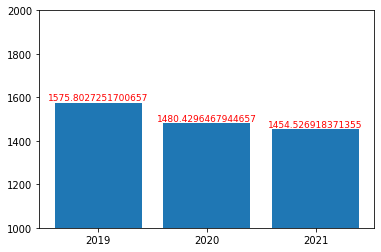

In [ ]:
# 전체 이용량 시각화
x = ['2019','2020', '2021']
y = [car_all_2019['합계'].mean(), car_all_2020['합계'].mean(), car_all_2021['합계'].mean()]

plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
    plt.ylim([1000, 2000])

plt.show()

In [ ]:
# 2019년, 2020년, 2021년의 평일 날짜가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
car_weekday_2019['월'] = car_weekday_2019['일자'].dt.month
car_weekday_2019['월'].value_counts()

7    23
5    23
4    22
1    22
8    21
3    20
9    19
6    19
2    17
Name: 월, dtype: int64

In [ ]:
car_weekday_2019

,일자,합계,월
0,2019-01-02,1537.169529,1
1,2019-01-03,1606.051517,1
2,2019-01-04,1631.428748,1
3,2019-01-07,1568.998905,1
4,2019-01-08,1610.706298,1
...,...,...,...
181,2019-09-24,1671.481018,9
182,2019-09-25,1677.324122,9
183,2019-09-26,1687.364574,9
184,2019-09-27,1716.394500,9


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','']
car_weekday_xname = ['JAN']
mon_len = [22,17,20,22,23,19,23,21,19] # 1~9월까지 평일 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    car_weekday_xname.append('')
    i +=1
  else:
    car_weekday_xname.append(month[j])
    j+=1
    i=0
  if len(car_weekday_xname) == sum(mon_len):
    break

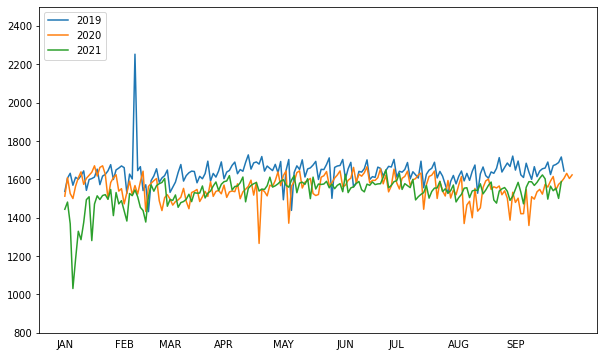

In [ ]:
# 평일 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(car_weekday_2019['합계'], label='2019')
plt.plot(car_weekday_2020['합계'], label='2020')
plt.plot(car_weekday_2021['합계'], label='2021')
plt.xticks(np.arange(186),car_weekday_xname)
plt.tick_params(bottom=False)
plt.ylim(800,2500)
plt.legend(loc=2)

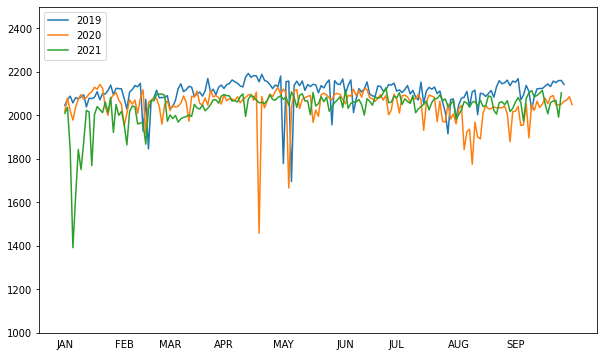

In [ ]:
# 평일 출퇴근 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(car_peak_2019['합계'], label='2019')
plt.plot(car_peak_2020['합계'], label='2020')
plt.plot(car_peak_2021['합계'], label='2021')
plt.xticks(np.arange(186),car_weekday_xname)
plt.tick_params(bottom=False)
plt.ylim(1000,2500)
plt.legend(loc=2)

In [ ]:
# 2019년, 2020년, 2021년의 주말 날짜가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
car_weekend_2019['월'] = car_weekend_2019['일자'].dt.month
car_weekend_2019['월'].value_counts()

9    11
6    11
3    11
2    11
8    10
1     9
7     8
5     8
4     8
Name: 월, dtype: int64

In [ ]:
car_weekend_2019

,일자,합계,월
0,2019-01-01,1223.939027,1
1,2019-01-05,1526.304942,1
2,2019-01-06,1303.006732,1
3,2019-01-12,1532.621827,1
4,2019-01-13,1300.296974,1
...,...,...,...
82,2019-09-15,1256.348232,9
83,2019-09-21,1595.062673,9
84,2019-09-22,1309.870546,9
85,2019-09-28,1645.194895,9


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','']
car_weekend_xname = ['JAN']
mon_len = [9,11,11,8,8,11,8,10,11] # 1~9월까지 주말 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    car_weekend_xname.append('')
    i +=1
  else:
    car_weekend_xname.append(month[j])
    j+=1
    i=0
  if len(car_weekend_xname) == sum(mon_len):
    break

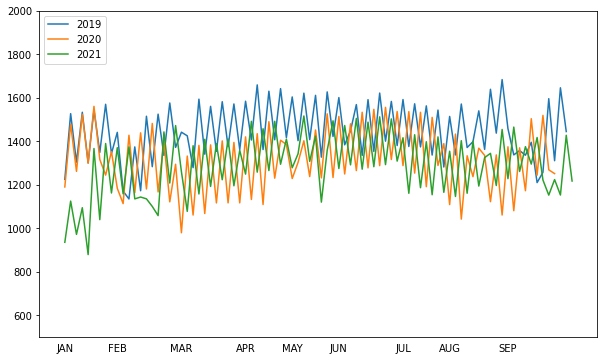

In [ ]:
# 주말 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(car_weekend_2019['합계'], label='2019')
plt.plot(car_weekend_2020['합계'], label='2020')
plt.plot(car_weekend_2021['합계'], label='2021')
plt.xticks(np.arange(87),car_weekend_xname)
plt.tick_params(bottom=False)
plt.ylim(500,2000)
plt.legend(loc=2)

##### 지하철

In [ ]:
# 데이터 불러오기
sub_all_2019 = pd.read_csv(default_path + '2. 지하철/전체 지하철 승차인원 2019 일별합계.csv', encoding='cp949')
sub_all_2020 = pd.read_csv(default_path + '2. 지하철/전체 지하철 승차인원 2020 일별합계.csv', encoding='cp949')
sub_all_2021 = pd.read_csv(default_path + '2. 지하철/전체 지하철 승차인원 2021 일별합계.csv', encoding='cp949')
sub_weekday_2019 = pd.read_csv(default_path + '2. 지하철/주중 지하철 승차인원 2019 일별합계.csv', encoding='cp949')
sub_weekday_2020 = pd.read_csv(default_path + '2. 지하철/주중 지하철 승차인원 2020 일별합계.csv', encoding='cp949')
sub_weekday_2021 = pd.read_csv(default_path + '2. 지하철/주중 지하철 승차인원 2021 일별합계.csv', encoding='cp949')
sub_peak_2019 = pd.read_csv(default_path + '2. 지하철/출퇴근 주중 지하철 승차인원 2019 일별합계.csv', encoding='cp949')
sub_peak_2020 = pd.read_csv(default_path + '2. 지하철/출퇴근 주중 지하철 승차인원 2020 일별합계.csv', encoding='cp949')
sub_peak_2021 = pd.read_csv(default_path + '2. 지하철/출퇴근 주중 지하철 승차인원 2021 일별합계.csv', encoding='cp949')
sub_weekend_2019 = pd.read_csv(default_path + '2. 지하철/주말 지하철 승차인원 2019 일별합계.csv', encoding='cp949')
sub_weekend_2020 = pd.read_csv(default_path + '2. 지하철/주말 지하철 승차인원 2020 일별합계.csv', encoding='cp949')
sub_weekend_2021 = pd.read_csv(default_path + '2. 지하철/주말 지하철 승차인원 2021 일별합계.csv', encoding='cp949')

In [ ]:
# '날짜' 형 변환
sub_all_2019['날짜'] = pd.to_datetime(sub_all_2019['날짜'])
sub_all_2020['날짜'] = pd.to_datetime(sub_all_2020['날짜'])
sub_all_2021['날짜'] = pd.to_datetime(sub_all_2021['날짜'])
sub_weekday_2019['날짜'] = pd.to_datetime(sub_weekday_2019['날짜'])
sub_weekday_2020['날짜'] = pd.to_datetime(sub_weekday_2020['날짜'])
sub_weekday_2021['날짜'] = pd.to_datetime(sub_weekday_2021['날짜'])
sub_peak_2019['날짜'] = pd.to_datetime(sub_peak_2019['날짜'])
sub_peak_2020['날짜'] = pd.to_datetime(sub_peak_2020['날짜'])
sub_peak_2021['날짜'] = pd.to_datetime(sub_peak_2021['날짜'])
sub_weekend_2019['날짜'] = pd.to_datetime(sub_weekend_2019['날짜'])
sub_weekend_2020['날짜'] = pd.to_datetime(sub_weekend_2020['날짜'])
sub_weekend_2021['날짜'] = pd.to_datetime(sub_weekend_2021['날짜'])

In [ ]:
# 각 월별 증감량, 증감률 구하기
sub_diff_1st = []
sub_rate_1st = []
sub_diff_2nd = []
sub_rate_2nd = []
for i in range(1,11):
  bymonth_2019 = sub_all_2019[sub_all_2019['날짜'].dt.month == i].sum()[0]/10000
  bymonth_2020 = sub_all_2020[sub_all_2020['날짜'].dt.month == i].sum()[0]/10000
  bymonth_2021 = sub_all_2021[sub_all_2021['날짜'].dt.month == i].sum()[0]/10000
  
  sub_diff_1st.append(bymonth_2020-bymonth_2019)
  sub_rate_1st.append(round((bymonth_2020-bymonth_2019)/bymonth_2019*100,2))
  sub_diff_2nd.append(bymonth_2021-bymonth_2020)
  sub_rate_2nd.append(round((bymonth_2021-bymonth_2020)/bymonth_2020*100,2))

In [ ]:
sub_month = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']
index = ['19-20 증감량', '19-20 증감률', '20-21 증감량', '20-21 증감률']

In [ ]:
sub_diff_df = pd.DataFrame([sub_diff_1st,sub_rate_1st,sub_diff_2nd,sub_rate_2nd], index=index, columns=sub_month).T

In [ ]:
sub_diff_df

,19-20 증감량,19-20 증감률,20-21 증감량,20-21 증감률
1월,-1075.6747,-7.35,-4275.5357,-31.52
2월,-1280.1153,-10.27,-1887.3826,-16.87
3월,-5974.9872,-39.24,2345.5585,25.35
4월,-5541.6330,-36.13,1676.0440,17.11
5월,-5011.9077,-31.81,460.2584,4.28
6월,-3132.1850,-21.82,338.0244,3.01
7월,-3042.2588,-20.28,-1632.7638,-13.65
8월,-4314.9471,-30.13,-129.7231,-1.30
9월,-4403.2961,-31.87,534.4438,5.68
10월,-4745.1420,-30.48,218.4809,2.02


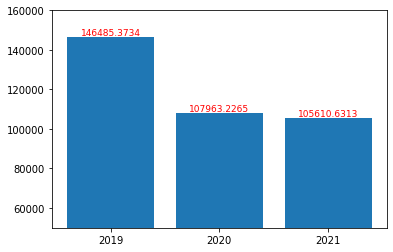

In [ ]:
# 전체 이용량 시각화
x = ['2019','2020', '2021']
y = [sub_all_2019['합계'].sum() / 10000,sub_all_2020['합계'].sum() / 10000, sub_all_2021['합계'].sum() / 10000] # 10000명 단위로 표현

plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
    plt.ylim([50000, 160000])

plt.show()

In [ ]:
# 2019년, 2020년, 2021년의 평일 날짜가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
sub_weekday_2019['월'] = sub_weekday_2019['날짜'].dt.month
sub_weekday_2019['월'].value_counts()

7     23
5     23
4     22
1     22
10    21
8     21
3     20
9     19
6     19
2     17
Name: 월, dtype: int64

In [ ]:
sub_weekday_2019

,날짜,합계,월
0,2019-01-02,5067609,1
1,2019-01-03,5255830,1
2,2019-01-04,5485567,1
3,2019-01-07,5199344,1
4,2019-01-08,5278474,1
...,...,...,...
202,2019-10-25,5970599,10
203,2019-10-28,5476343,10
204,2019-10-29,5605614,10
205,2019-10-30,5620482,10


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT', '']
sub_weekday_xname = ['JAN']
mon_len = [22,17,20,22,23,19,23,21,19,21] # 1~10월까지 평일 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    sub_weekday_xname.append('')
    i +=1
  else:
    sub_weekday_xname.append(month[j])
    j+=1
    i=0
  if len(sub_weekday_xname) == sum(mon_len):
    break

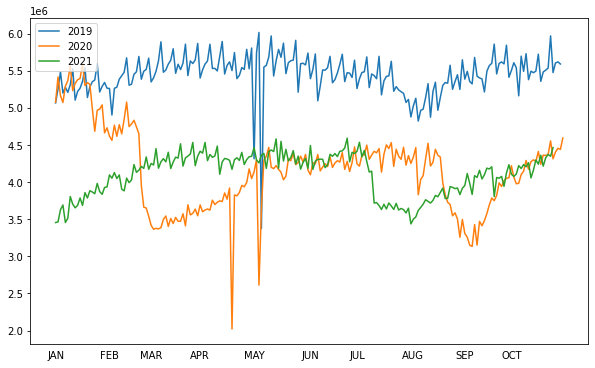

In [ ]:
# 평일 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(sub_weekday_2019['합계'], label='2019')
plt.plot(sub_weekday_2020['합계'], label='2020')
plt.plot(sub_weekday_2021['합계'], label='2021')
plt.xticks(np.arange(207),sub_weekday_xname)
plt.tick_params(bottom=False)
plt.legend(loc=2)

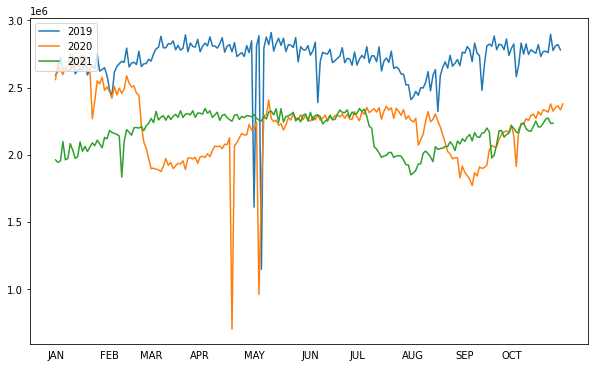

In [ ]:
# 평일 출퇴근 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(sub_peak_2019['합계'], label='2019')
plt.plot(sub_peak_2020['합계'], label='2020')
plt.plot(sub_peak_2021['합계'], label='2021')
plt.xticks(np.arange(207),sub_weekday_xname)
plt.tick_params(bottom=False)
plt.legend(loc=2)

In [ ]:
# 2019년, 2020년, 2021년의 주말 날짜가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
sub_weekend_2019['월'] = sub_weekend_2019['날짜'].dt.month
sub_weekend_2019['월'].value_counts()

9     11
6     11
3     11
2     11
10    10
8     10
1      9
7      8
5      8
4      8
Name: 월, dtype: int64

In [ ]:
sub_weekend_2019

,날짜,합계,월
0,2019-01-01,2169874,1
1,2019-01-05,3921397,1
2,2019-01-06,2777687,1
3,2019-01-12,4065243,1
4,2019-01-13,2834657,1
...,...,...,...
92,2019-10-13,3208473,10
93,2019-10-19,4579395,10
94,2019-10-20,3203199,10
95,2019-10-26,4774154,10


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP', 'OCT', '']
sub_weekend_xname = ['JAN']
mon_len = [9,11,11,8,8,11,8,10,11,10] # 1~10월까지 주말 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    sub_weekend_xname.append('')
    i +=1
  else:
    sub_weekend_xname.append(month[j])
    j+=1
    i=0
  if len(sub_weekend_xname) == sum(mon_len):
    break

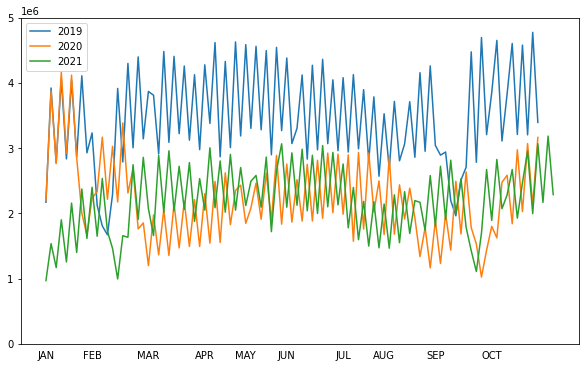

In [ ]:
# 주말 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(sub_weekend_2019['합계'], label='2019')
plt.plot(sub_weekend_2020['합계'], label='2020')
plt.plot(sub_weekend_2021['합계'], label='2021')
plt.xticks(np.arange(97),sub_weekend_xname)
plt.tick_params(bottom=False)
plt.ylim(0, 5000000)
plt.legend(loc=2)

##### 버스

In [ ]:
# 데이터 불러오기
bus_all_2019 = pd.read_csv(default_path + '3. 버스/전체 2019 일별합계.csv', encoding='cp949')
bus_all_2020 = pd.read_csv(default_path + '3. 버스/전체 2020 일별합계.csv', encoding='cp949')
bus_all_2021 = pd.read_csv(default_path + '3. 버스/전체 2021 일별합계.csv', encoding='cp949')
bus_weekday_2019 = pd.read_csv(default_path + '3. 버스/주중 2019 일별합계.csv', encoding='cp949')
bus_weekday_2020 = pd.read_csv(default_path + '3. 버스/주중 2020 일별합계.csv', encoding='cp949')
bus_weekday_2021 = pd.read_csv(default_path + '3. 버스/주중 2021 일별합계.csv', encoding='cp949')
bus_peak_2019 = pd.read_csv(default_path + '3. 버스/출퇴근 2019 일별합계.csv', encoding='cp949')
bus_peak_2020 = pd.read_csv(default_path + '3. 버스/출퇴근 2020 일별합계.csv', encoding='cp949')
bus_peak_2021 = pd.read_csv(default_path + '3. 버스/출퇴근 2021 일별합계.csv', encoding='cp949')
bus_weekend_2019 = pd.read_csv(default_path + '3. 버스/주말 2019 일별합계.csv', encoding='cp949')
bus_weekend_2020 = pd.read_csv(default_path + '3. 버스/주말 2020 일별합계.csv', encoding='cp949')
bus_weekend_2021 = pd.read_csv(default_path + '3. 버스/주말 2021 일별합계.csv', encoding='cp949')

In [ ]:
# '사용일자' 형 변환
bus_all_2019['사용일자'] = pd.to_datetime(bus_all_2019['사용일자'])
bus_all_2020['사용일자'] = pd.to_datetime(bus_all_2020['사용일자'])
bus_all_2021['사용일자'] = pd.to_datetime(bus_all_2021['사용일자'])
bus_weekday_2019['사용일자'] = pd.to_datetime(bus_weekday_2019['사용일자'])
bus_weekday_2020['사용일자'] = pd.to_datetime(bus_weekday_2020['사용일자'])
bus_weekday_2021['사용일자'] = pd.to_datetime(bus_weekday_2021['사용일자'])
bus_weekend_2019['사용일자'] = pd.to_datetime(bus_weekend_2019['사용일자'])
bus_weekend_2020['사용일자'] = pd.to_datetime(bus_weekend_2020['사용일자'])
bus_weekend_2021['사용일자'] = pd.to_datetime(bus_weekend_2021['사용일자'])

In [ ]:
# 출퇴근 시간은 월별로 제공되기 때문에 datetime 대신 뒤에서 두자리만 짤라 월 컬럼 생성
bus_peak_2019['월'] = bus_peak_2019['사용년월'].astype('str')
for i in range(len(bus_peak_2019)):
  bus_peak_2019['월'][i] = bus_peak_2019['월'][i][-2:]
bus_peak_2020['월'] = bus_peak_2020['사용년월'].astype('str')
for i in range(len(bus_peak_2020)):
  bus_peak_2020['월'][i] = bus_peak_2020['월'][i][-2:]
bus_peak_2021['월'] = bus_peak_2021['사용년월'].astype('str')
for i in range(len(bus_peak_2021)):
  bus_peak_2021['월'][i] = bus_peak_2021['월'][i][-2:]

In [ ]:
# 각 월별 증감량, 증감률 구하기
bus_diff_1st = []
bus_rate_1st = []
bus_diff_2nd = []
bus_rate_2nd = []
for i in range(1,11):
  bymonth_2019 = bus_all_2019[bus_all_2019['사용일자'].dt.month == i].sum()[0]/10000
  bymonth_2020 = bus_all_2020[bus_all_2020['사용일자'].dt.month == i].sum()[0]/10000
  bymonth_2021 = bus_all_2021[bus_all_2021['사용일자'].dt.month == i].sum()[0]/10000
  
  bus_diff_1st.append(bymonth_2020-bymonth_2019)
  bus_rate_1st.append(round((bymonth_2020-bymonth_2019)/bymonth_2019*100,2))
  bus_diff_2nd.append(bymonth_2021-bymonth_2020)
  bus_rate_2nd.append(round((bymonth_2021-bymonth_2020)/bymonth_2020*100,2))

In [ ]:
bus_month = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월']
index = ['19-20 증감량', '19-20 증감률', '20-21 증감량', '20-21 증감률']

In [ ]:
bus_diff_df = pd.DataFrame([bus_diff_1st,bus_rate_1st,bus_diff_2nd,bus_rate_2nd], index=index, columns=bus_month).T

In [ ]:
bus_diff_df

,19-20 증감량,19-20 증감률,20-21 증감량,20-21 증감률
1월,-930.0273,-6.08,-4265.9428,-29.68
2월,-844.2904,-6.41,-2214.4062,-17.98
3월,-5602.6891,-34.73,1997.2505,18.97
4월,-5152.8854,-31.83,1291.4235,11.70
5월,-4514.4252,-27.10,26.9291,0.22
6월,-2597.1070,-16.79,-187.0646,-1.45
7월,-2652.3187,-16.20,-1801.2160,-13.13
8월,-4173.6170,-26.31,-151.4512,-1.30
9월,-4086.1357,-27.00,490.9513,4.44
10월,-4199.0656,-25.43,35.4194,0.29


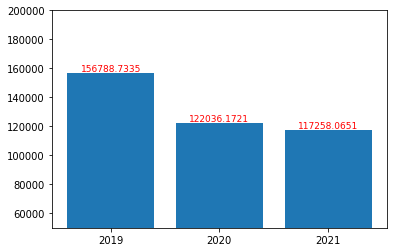

In [ ]:
# 전체 이용량 시각화
x = ['2019','2020', '2021']
y = [bus_all_2019['합계'].sum() / 10000,bus_all_2020['합계'].sum() / 10000, bus_all_2021['합계'].sum() / 10000] # 10000명 단위로 표현

plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
    plt.ylim([50000, 200000])

plt.show()

In [ ]:
# 2019년, 2020년, 2021년의 평일 사용일자가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
bus_weekday_2019['월'] = bus_weekday_2019['사용일자'].dt.month
bus_weekday_2019['월'].value_counts()

7     23
5     23
4     22
1     22
10    21
8     21
3     20
9     19
6     19
2     17
Name: 월, dtype: int64

In [ ]:
bus_weekday_2019

,사용일자,합계,월
0,2019-01-02,5328586,1
1,2019-01-03,5457074,1
2,2019-01-04,5613975,1
3,2019-01-07,5454007,1
4,2019-01-08,5521912,1
...,...,...,...
202,2019-10-25,6136047,10
203,2019-10-28,5863953,10
204,2019-10-29,5926802,10
205,2019-10-30,6024908,10


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT', '']
bus_weekday_xname = ['JAN']
mon_len = [22,17,20,22,23,19,23,21,19,21] # 1~10월까지 평일 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    bus_weekday_xname.append('')
    i +=1
  else:
    bus_weekday_xname.append(month[j])
    j+=1
    i=0
  if len(bus_weekday_xname) == sum(mon_len):
    break

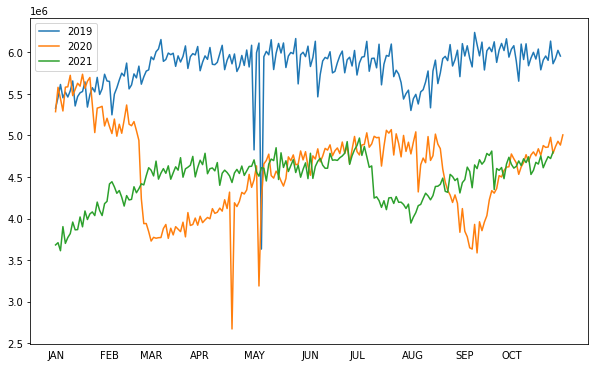

In [ ]:
# 평일 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(bus_weekday_2019['합계'], label='2019')
plt.plot(bus_weekday_2020['합계'], label='2020')
plt.plot(bus_weekday_2021['합계'], label='2021')
plt.xticks(np.arange(207),bus_weekday_xname)
plt.tick_params(bottom=False)
plt.legend(loc=2)

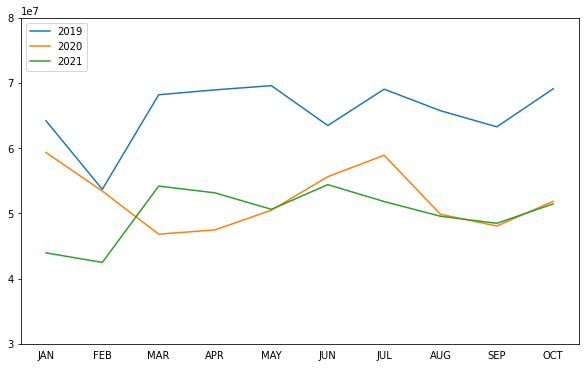

In [ ]:
# 평일 출퇴근 시간대 이용량 시각화
bus_peak_xname = ['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT']
plt.figure(figsize=(10,6))
plt.plot(bus_peak_2019['합계'], label='2019')
plt.plot(bus_peak_2020['합계'], label='2020')
plt.plot(bus_peak_2021['합계'], label='2021')
plt.xticks(np.arange(10),bus_peak_xname)
plt.tick_params(bottom=False)
plt.ylim(30000000, 80000000)
plt.legend(loc=2)

In [ ]:
# 2019년, 2020년, 2021년의 주말 날짜가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
bus_weekend_2019['월'] = bus_weekend_2019['사용일자'].dt.month
bus_weekend_2019['월'].value_counts()

9     11
6     11
3     11
2     11
10    10
8     10
1      9
7      8
5      8
4      8
Name: 월, dtype: int64

In [ ]:
bus_weekend_2019

,사용일자,합계,월
0,2019-01-01,2421369,1
1,2019-01-05,4050127,1
2,2019-01-06,3118038,1
3,2019-01-12,4119460,1
4,2019-01-13,3095130,1
...,...,...,...
92,2019-10-13,3553527,10
93,2019-10-19,4626462,10
94,2019-10-20,3535820,10
95,2019-10-26,4704863,10


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP', 'OCT', '']
bus_weekend_xname = ['JAN']
mon_len = [9,11,11,8,8,11,8,10,11,10] # 1~10월까지 주말 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    bus_weekend_xname.append('')
    i +=1
  else:
    bus_weekend_xname.append(month[j])
    j+=1
    i=0
  if len(bus_weekend_xname) == sum(mon_len):
    break

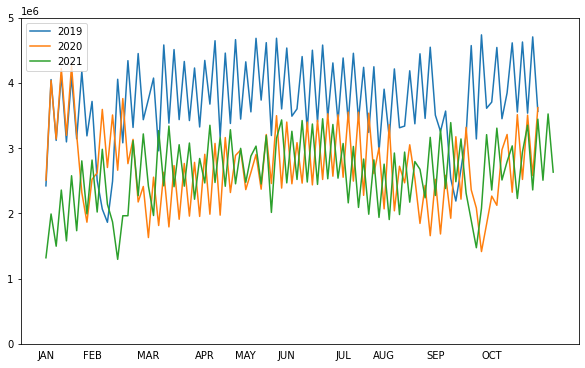

In [ ]:
# 주말 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(bus_weekend_2019['합계'], label='2019')
plt.plot(bus_weekend_2020['합계'], label='2020')
plt.plot(bus_weekend_2021['합계'], label='2021')
plt.xticks(np.arange(97),bus_weekend_xname)
plt.tick_params(bottom=False)
plt.ylim(0, 5000000)
plt.legend(loc=2)

##### 공공자전거

In [ ]:
# 데이터 불러오기
bic_all_2019 = pd.read_csv(default_path + '4. 공공자전거/전체 대여량 2019 일별합계.csv', encoding='cp949')
bic_all_2020 = pd.read_csv(default_path + '4. 공공자전거/전체 대여량 2020 일별합계.csv', encoding='cp949')
bic_all_2021 = pd.read_csv(default_path + '4. 공공자전거/전체 대여량 2021 일별합계.csv', encoding='cp949')
bic_weekday_2019 = pd.read_csv(default_path + '4. 공공자전거/주중 대여량 2019 일별합계.csv', encoding='cp949')
bic_weekday_2020 = pd.read_csv(default_path + '4. 공공자전거/주중 대여량 2020 일별합계.csv', encoding='cp949')
bic_weekday_2021 = pd.read_csv(default_path + '4. 공공자전거/주중 대여량 2021 일별합계.csv', encoding='cp949')
bic_peak_2019 = pd.read_csv(default_path + '4. 공공자전거/출퇴근 주중 대여량 2019 일별합계.csv', encoding='cp949')
bic_peak_2020 = pd.read_csv(default_path + '4. 공공자전거/출퇴근 주중 대여량 2020 일별합계.csv', encoding='cp949')
bic_peak_2021 = pd.read_csv(default_path + '4. 공공자전거/출퇴근 주중 대여량 2021 일별합계.csv', encoding='cp949')
bic_weekend_2019 = pd.read_csv(default_path + '4. 공공자전거/주말 대여량 2019 일별합계.csv', encoding='cp949')
bic_weekend_2020 = pd.read_csv(default_path + '4. 공공자전거/주말 대여량 2020 일별합계.csv', encoding='cp949')
bic_weekend_2021 = pd.read_csv(default_path + '4. 공공자전거/주말 대여량 2021 일별합계.csv', encoding='cp949')

In [ ]:
# '대여일자' 형 변환
bic_all_2019['대여일자'] = pd.to_datetime(bic_all_2019['대여일자'])
bic_all_2020['대여일자'] = pd.to_datetime(bic_all_2020['대여일자'])
bic_all_2021['대여일자'] = pd.to_datetime(bic_all_2021['대여일자'])
bic_weekday_2019['대여일자'] = pd.to_datetime(bic_weekday_2019['대여일자'])
bic_weekday_2020['대여일자'] = pd.to_datetime(bic_weekday_2020['대여일자'])
bic_weekday_2021['대여일자'] = pd.to_datetime(bic_weekday_2021['대여일자'])
bic_peak_2019['대여일자'] = pd.to_datetime(bic_peak_2019['대여일자'])
bic_peak_2020['대여일자'] = pd.to_datetime(bic_peak_2020['대여일자'])
bic_peak_2021['대여일자'] = pd.to_datetime(bic_peak_2021['대여일자'])
bic_weekend_2019['대여일자'] = pd.to_datetime(bic_weekend_2019['대여일자'])
bic_weekend_2020['대여일자'] = pd.to_datetime(bic_weekend_2020['대여일자'])
bic_weekend_2021['대여일자'] = pd.to_datetime(bic_weekend_2021['대여일자'])

In [ ]:
# 각 월별 증감량, 증감률 구하기
bic_diff_1st = []
bic_rate_1st = []
bic_diff_2nd = []
bic_rate_2nd = []
for i in range(1,7):
  bymonth_2019 = bic_all_2019[bic_all_2019['대여일자'].dt.month == i].sum()[0]/10000
  bymonth_2020 = bic_all_2020[bic_all_2020['대여일자'].dt.month == i].sum()[0]/10000
  bymonth_2021 = bic_all_2021[bic_all_2021['대여일자'].dt.month == i].sum()[0]/10000
  
  bic_diff_1st.append(bymonth_2020-bymonth_2019)
  bic_rate_1st.append(round((bymonth_2020-bymonth_2019)/bymonth_2019*100,2))
  bic_diff_2nd.append(bymonth_2021-bymonth_2020)
  bic_rate_2nd.append(round((bymonth_2021-bymonth_2020)/bymonth_2020*100,2))

In [ ]:
bic_month = ['1월', '2월', '3월', '4월', '5월', '6월']
index = ['19-20 증감량', '19-20 증감률', '20-21 증감량', '20-21 증감률']

In [ ]:
bic_diff_df = pd.DataFrame([bic_diff_1st,bic_rate_1st,bic_diff_2nd,bic_rate_2nd], index=index, columns=bic_month).T

In [ ]:
bic_diff_df

,19-20 증감량,19-20 증감률,20-21 증감량,20-21 증감률
1월,41.3604,141.29,1.2521,1.77
2월,39.6767,142.96,43.4355,64.42
3월,69.0187,129.65,57.1748,46.77
4월,46.1814,38.57,94.1167,56.72
5월,16.1785,9.55,42.4556,22.88
6월,38.9935,22.45,49.0050,23.04


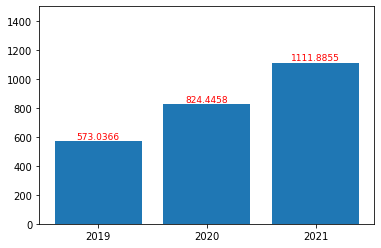

In [ ]:
# 전체 이용량 시각화
x = ['2019','2020', '2021']
y = [bic_all_2019['합계'].sum() / 10000,bic_all_2020['합계'].sum() / 10000, bic_all_2021['합계'].sum() / 10000] # 10000명 단위로 표현

plt.bar(x,y)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')
    plt.ylim([0, 1500])

plt.show()

In [ ]:
# 2019년, 2020년, 2021년의 평일 사용일자가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
bic_weekday_2019['월'] = bic_weekday_2019['대여일자'].dt.month
bic_weekday_2019['월'].value_counts()

5    23
4    22
1    22
3    20
6    19
2    17
Name: 월, dtype: int64

In [ ]:
bic_weekday_2019

,대여일자,합계,월
0,2019-01-02,8817,1
1,2019-01-03,9830,1
2,2019-01-04,10289,1
3,2019-01-07,10029,1
4,2019-01-08,9434,1
...,...,...,...
118,2019-06-24,65159,6
119,2019-06-25,65466,6
120,2019-06-26,62198,6
121,2019-06-27,59819,6


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN', '']
bic_weekday_xname = ['JAN']
mon_len = [22,17,20,22,23,19] # 1~6월까지 평일 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    bic_weekday_xname.append('')
    i +=1
  else:
    bic_weekday_xname.append(month[j])
    j+=1
    i=0
  if len(bic_weekday_xname) == sum(mon_len):
    break

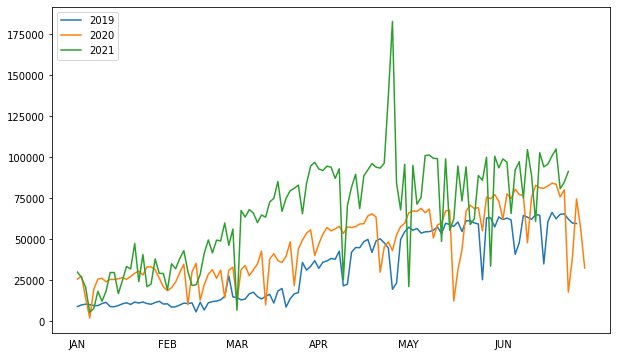

In [ ]:
# 평일 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(bic_weekday_2019['합계'], label='2019')
plt.plot(bic_weekday_2020['합계'], label='2020')
plt.plot(bic_weekday_2021['합계'], label='2021')
plt.xticks(np.arange(123),bic_weekday_xname)
plt.tick_params(bottom=False)
plt.legend(loc=2)

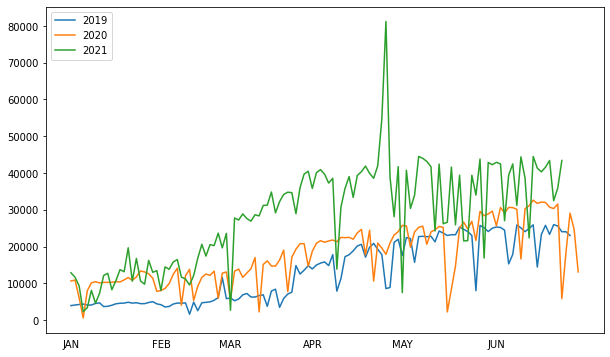

In [ ]:
# 평일 출퇴근 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(bic_peak_2019['합계'], label='2019')
plt.plot(bic_peak_2020['합계'], label='2020')
plt.plot(bic_peak_2021['합계'], label='2021')
plt.xticks(np.arange(123),bic_weekday_xname)
plt.tick_params(bottom=False)
plt.legend(loc=2)

In [ ]:
# 2019년, 2020년, 2021년의 주말 날짜가 다 다르기 때문에 2019년을 기준으로 대략적인 월만 표시
bic_weekend_2019['월'] = bic_weekend_2019['대여일자'].dt.month
bic_weekend_2019['월'].value_counts()

6    11
3    11
2    11
1     9
5     8
4     8
Name: 월, dtype: int64

In [ ]:
bic_weekend_2019

,대여일자,합계,월
0,2019-01-01,5232,1
1,2019-01-05,7590,1
2,2019-01-06,6711,1
3,2019-01-12,8544,1
4,2019-01-13,6827,1
5,2019-01-19,8710,1
6,2019-01-20,6582,1
7,2019-01-26,7848,1
8,2019-01-27,7316,1
9,2019-02-02,7885,2


In [ ]:
month = ['FEB','MAR','APR','MAY','JUN', '']
bic_weekend_xname = ['JAN']
mon_len = [9,11,11,8,8,11] # 1~6월까지 주말 개수
i = 0
j = 0
for x in range(sum(mon_len)):
  if i < mon_len[j]-1:
    bic_weekend_xname.append('')
    i +=1
  else:
    bic_weekend_xname.append(month[j])
    j+=1
    i=0
  if len(bic_weekend_xname) == sum(mon_len):
    break

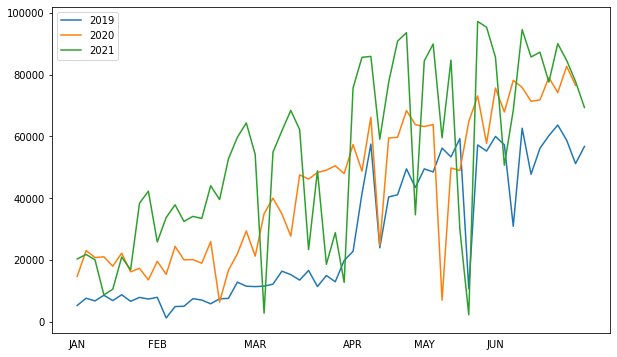

In [ ]:
# 주말 전체 시간대 이용량 시각화
plt.figure(figsize=(10,6))
plt.plot(bic_weekend_2019['합계'], label='2019')
plt.plot(bic_weekend_2020['합계'], label='2020')
plt.plot(bic_weekend_2021['합계'], label='2021')
plt.xticks(np.arange(58),bic_weekend_xname)
plt.tick_params(bottom=False)
plt.legend(loc=2)

## 2: 위치 기준 전처리 및 시각화



*   수단별 위치를 기준으로 groupby를 통해 각 위치의 이용량 평균, 합계를 구하여 사용
    * 각 관측소, 역, 정류소, 대여소의 위도, 경도 정보 활용



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
default_path = '/content/drive/Shareddrives/전자제조데이터분석_예빈,주현/통합데이터3/'
point_path = '/content/drive/Shareddrives/전자제조데이터분석_예빈,주현/원본데이터/'

In [ ]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 13.3 MB/s 
     |████████████████████████████████| 6.3 MB 27.9 MB/s 
     |████████████████████████████████| 15.4 MB 35.3 MB/s 


In [ ]:
import shapely.geometry as geo
import geopandas as gpd
from pyproj import Proj, transform

##### 승용차

In [ ]:
#승용차 조사지점
car_point = pd.read_excel(point_path + '승용차/수집지점좌표.xlsx')

In [ ]:
car_point

,지점번호,지점명칭,검지기 유형,위도,경도,주소,도로명 주소,유입 방향,유출방향
0,A-01,성산로(금화터널),지자기,37.568588,126.948436,서울시 서대문구 신촌동 1-142,NaN,[성산로]봉원고가차도->독립문역,[성산로]독립문역->봉원고가차도
1,A-02,사직로(사직터널),지자기,37.572298,126.962853,서울시 종로구 행촌동 1-186,NaN,[사직로]독립문역->사직단,[사직로]사직단->독립문역
2,A-03,자하문로(자하문터널),지자기,37.588831,126.968548,서울시 종로구 청운동 24-6,NaN,[자하문로]석파정->청운초등학교,[자하문로]청운초등학교->석파정
3,A-04,대사관로(삼청터널),지자기,37.596359,126.984209,서울시 성북구 성북동 산25-148,NaN,[삼청로]삼청각->삼청공원입구,[삼청로]삼청공원입구->삼청각
4,A-05,율곡로(안국역),지자기,37.576000,126.984342,서울시 종로구 경운동 90-4,서울시 종로구 율곡로 46,[율곡로]안국역->안국동사거리,[율곡로]안국동사거리->안국역
...,...,...,...,...,...,...,...,...,...
130,F-05,동부간선도로,영상,37.568685,127.076023,서울시 동대문구 장안동 19-7,NaN,[동부간선도로]장안교->군자교,[동부간선도로]군자교->장안교
131,F-06,경부고속도로,영상,37.493135,127.022533,서울시 서초구 서초동 1748-26,NaN,[경부고속도로]서초2교 -> 서초IC,[경부고속도로]서초IC -> 서초2교
132,F-07,분당수서로,영상,37.497648,127.087195,서울시 강남구 일원동 467-1,NaN,[분당수서로]수서IC->탄천1교,[분당수서로]탄천1교->수서IC
133,F-08,강남순환로(관악터널),지자기,37.449096,126.926169,서울시 금천구 시흥동 산 93-1,NaN,[강남순환로]금천요금소->관악IC,[노들로]관악IC->금천요금소


In [ ]:
car_point.isnull().sum()

지점번호        0
지점명칭        0
검지기 유형      0
위도          0
경도          0
주소          0
도로명 주소    104
유입 방향       0
유출방향        0
dtype: int64

In [ ]:
# 데이터 불러오기
car2019 = pd.read_excel(default_path + '1. 승용차/교통량 2019.xlsx')
car2020 = pd.read_excel(default_path + '1. 승용차/교통량 2020.xlsx')
car2021 = pd.read_excel(default_path + '1. 승용차/교통량 2021.xlsx')

In [ ]:
# groupby 사용 -> 관측소별 평균 구하기
gb_car2019 = car2019.groupby(by = ['지점번호'], as_index = False).mean()
gb_car2020 = car2020.groupby(by = ['지점번호'], as_index = False).mean()
gb_car2021 = car2021.groupby(by = ['지점번호'], as_index = False).mean()

In [ ]:
car_bypoint_2019 = pd.DataFrame({'지점번호' : gb_car2019['지점번호'],'평균' : gb_car2019.mean(axis=1, numeric_only=True)})
car_bypoint_2020 = pd.DataFrame({'지점번호' : gb_car2020['지점번호'],'평균' : gb_car2020.mean(axis=1, numeric_only=True)})
car_bypoint_2021 = pd.DataFrame({'지점번호' : gb_car2021['지점번호'],'평균' : gb_car2021.mean(axis=1, numeric_only=True)})

In [ ]:
car_bypoint_2021

,지점번호,평균
0,A-01,1178.304759
1,A-02,1294.009786
2,A-03,541.855311
3,A-04,226.382279
4,A-05,1026.994306
...,...,...
130,F-05,2750.786789
131,F-06,3907.994950
132,F-07,2705.627013
133,F-08,1753.633690


In [ ]:
print(sum(car_point['지점번호'] == car_bypoint_2019['지점번호']))
print(sum(car_point['지점번호'] == car_bypoint_2020['지점번호']))
print(sum(car_point['지점번호'] == car_bypoint_2021['지점번호']))
# 2019,2020,2021년 모두 동일한 지점(Point)을 갖고있음.

135
135
135


In [ ]:
coor_df = car_point[['위도','경도']]

In [ ]:
# 좌표계 변환
epsg5179= Proj(init="epsg:5179")
wgs84=Proj(init='epsg:4326')

In [ ]:
def convert_coor(df):
  for i in range(len(df)):
    df.iloc[i] = transform(wgs84,epsg5179, coor_df.iloc[i,1], coor_df.iloc[i,0])
  return df.values.tolist()

In [ ]:
coor_list = convert_coor(coor_df)

In [ ]:
def make_point(coor_list):
    point_list = []
    for i in range(len(coor_list)):
        coor = coor_list[i]
        point = geo.Point(coor)
        point_list.append(point)
    
    return point_list

In [ ]:
car_info = gpd.GeoDataFrame({'지점번호' : car_point['지점번호'], 'geometry' : make_point(coor_list)})
car_info

,지점번호,geometry
0,A-01,POINT (951291.650 1952278.648)
1,A-02,POINT (952567.171 1952682.880)
2,A-03,POINT (953080.449 1954514.280)
3,A-04,POINT (954467.687 1955341.770)
4,A-05,POINT (954467.028 1953082.968)
...,...,...
130,F-05,POINT (962558.906 1952230.925)
131,F-06,POINT (957792.665 1943871.745)
132,F-07,POINT (963510.909 1944345.402)
133,F-08,POINT (949244.400 1939033.471)


In [ ]:
# 이용률 변화 구하기
car_info['rate1920'] = (car_bypoint_2020['평균'] - car_bypoint_2019['평균'])/car_bypoint_2019['평균']
car_info['rate2021'] = (car_bypoint_2021['평균'] - car_bypoint_2020['평균'])/car_bypoint_2020['평균']

In [ ]:
car_info

,지점번호,geometry,rate1920,rate2021
0,A-01,POINT (951291.650 1952278.648),-0.099368,-0.040696
1,A-02,POINT (952567.171 1952682.880),-0.097007,-0.039750
2,A-03,POINT (953080.449 1954514.280),-0.083839,-0.045645
3,A-04,POINT (954467.687 1955341.770),-0.074894,0.028077
4,A-05,POINT (954467.028 1953082.968),-0.059170,-0.050911
...,...,...,...,...
130,F-05,POINT (962558.906 1952230.925),-0.038444,-0.044539
131,F-06,POINT (957792.665 1943871.745),-0.057053,-0.022452
132,F-07,POINT (963510.909 1944345.402),-0.013531,-0.022040
133,F-08,POINT (949244.400 1939033.471),0.043017,0.100491


In [ ]:
car_info['rate1920'].describe()

count    135.000000
mean      -0.065474
std        0.049285
min       -0.275878
25%       -0.088484
50%       -0.059627
75%       -0.040888
max        0.048246
Name: rate1920, dtype: float64

In [ ]:
car_info['rate2021'].describe()

count    135.000000
mean      -0.026002
std        0.045167
min       -0.200113
25%       -0.044786
50%       -0.026894
75%       -0.009225
max        0.141213
Name: rate2021, dtype: float64

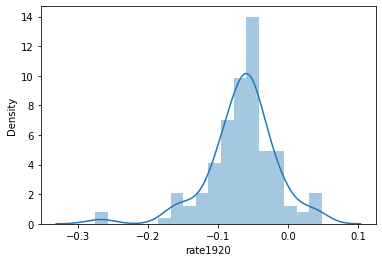

In [ ]:
sns.distplot(car_info['rate1920'])

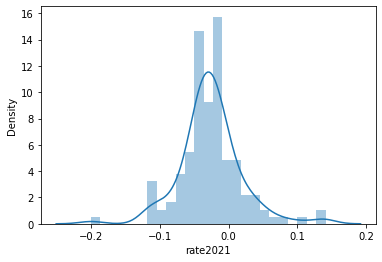

In [ ]:
sns.distplot(car_info['rate2021'])

In [ ]:
#서울시 지도
seoul = gpd.read_file(point_path + 'seoul/bnd_sigungu_11_2020_2020_2Q.shp', encoding = 'cp949')

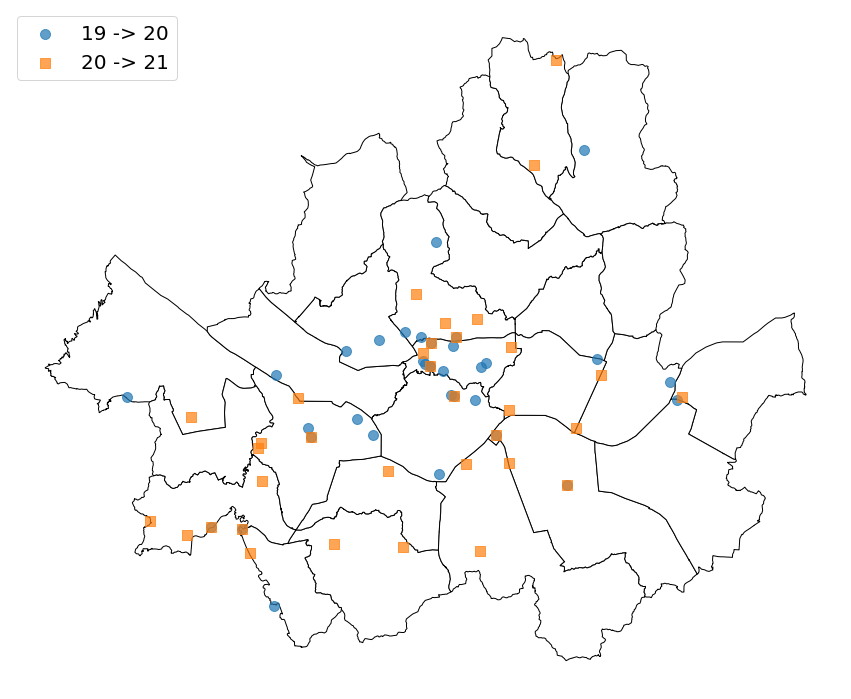

In [ ]:
# 감소폭이 큰 경우: 1사분위 수 안쪽
c1 = car_info[car_info['rate1920'] <  -0.088484]
c2 = car_info[car_info['rate2021'] <  -0.044786]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

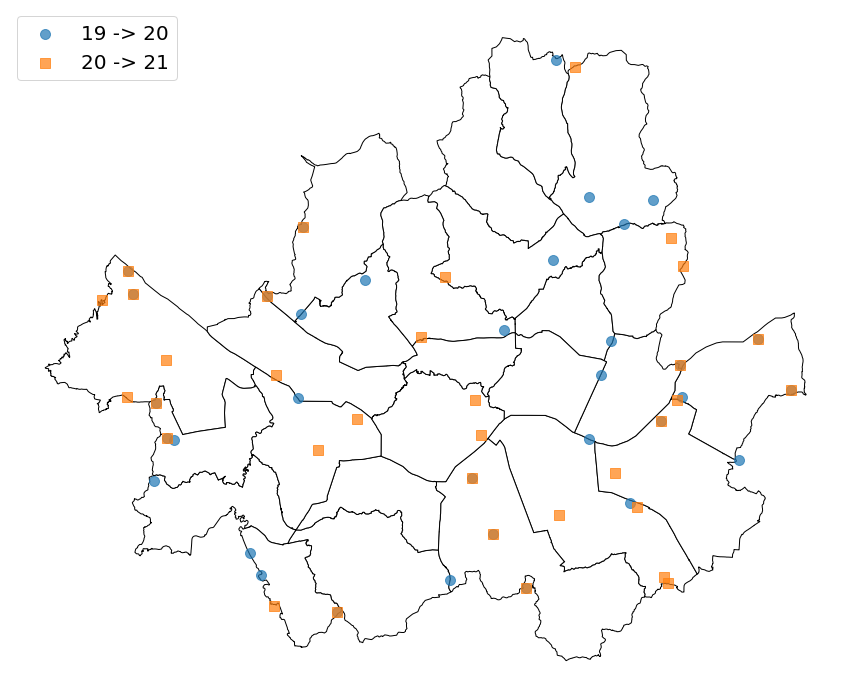

In [ ]:
# 감소폭이 작거나 증가한 경우: 3사분위 수 바깥쪽
c1 = car_info[car_info['rate1920'] >  -0.040888]
c2 = car_info[car_info['rate2021'] >  -0.009225]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

##### 지하철

In [ ]:
# 지하철 역 좌표
sub_point = pd.read_csv(point_path + '지하철/station_coordinate.csv')

In [ ]:
sub_point

,line,name,code,lat,lng
0,01호선,녹양,1908.0,37.759380,127.042292
1,01호선,남영,1002.0,37.541021,126.971300
2,01호선,용산,1003.0,37.529849,126.964561
3,01호선,노량진,1004.0,37.514219,126.942454
4,01호선,대방,1005.0,37.513342,126.926382
...,...,...,...,...,...
725,인천선,지식정보단지,3135.0,37.378384,126.645168
726,인천선,인천대입구,3136.0,37.386007,126.639484
727,인천선,센트럴파크,3137.0,37.393054,126.634729
728,인천선,국제업무지구,3138.0,37.399907,126.630347


In [ ]:
# 1~8호선 역만 사용
sub_point = sub_point[(sub_point['line'] == '01호선') | (sub_point['line'] == '02호선') | (sub_point['line'] == '03호선') | (sub_point['line'] == '04호선') |
          (sub_point['line'] == '05호선') |(sub_point['line'] == '06호선') | (sub_point['line'] == '07호선') | (sub_point['line'] == '08호선')]

In [ ]:
sub_point.isnull().sum()

line    0
name    0
code    0
lat     2
lng     2
dtype: int64

In [ ]:
# 데이터 불러오기
sub2019 = pd.read_excel(default_path + '2. 지하철/지하철 승하차인원 2019.xlsx')
sub2020 = pd.read_csv(default_path + '2. 지하철/지하철 승하차인원 2020.csv', encoding='cp949')
sub2021 = pd.read_excel(default_path + '2. 지하철/지하철 승하차인원 2021.xlsx')

In [ ]:
# 승차 자료만 사용
ride_sub2019 = sub2019.loc[sub2019['구분'] == '승차', :]
ride_sub2020 = sub2020.loc[sub2020['구분'] == '승차', :]
ride_sub2021 = sub2021.loc[sub2021['구분'] == '승차', :]

In [ ]:
# 컬럼 이름 변경
ride_sub2019.columns = ['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', 
                        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후', '합계']
ride_sub2020.columns = ['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', 
                        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '24시 이후']
ride_sub2021.columns = ['날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06 ~ 07', '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13', '13 ~ 14', 
                        '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19', '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23시 이후', '합계']

In [ ]:
# '합계' 컬럼 drop
ride_sub2019 = ride_sub2019.drop('합계', axis = 1)
ride_sub2021 = ride_sub2021.drop('합계', axis = 1)

In [ ]:
# groupby 사용 -> 역별 합계 구하기
gb_sub2019 = ride_sub2019.groupby(by = ['역번호'], as_index = False).sum()
gb_sub2020 = ride_sub2020.groupby(by = ['역번호'], as_index = False).sum()
gb_sub2021 = ride_sub2021.groupby(by = ['역번호'], as_index = False).sum()

In [ ]:
sub_bypoint_2019 = pd.DataFrame({'역번호' : gb_sub2019['역번호'],'19합계' : gb_sub2019.sum(axis = 1, numeric_only=True)})
sub_bypoint_2020 = pd.DataFrame({'역번호' : gb_sub2020['역번호'],'20합계' : gb_sub2020.sum(axis = 1, numeric_only=True)})
sub_bypoint_2021 = pd.DataFrame({'역번호' : gb_sub2021['역번호'],'21합계' : gb_sub2021.sum(axis = 1, numeric_only=True)})

In [ ]:
print(len(sub_bypoint_2019))
print(len(sub_bypoint_2020))
print(len(sub_bypoint_2021))
# 2019년의 역 개수가 가장 작음, 2019년 기준 존재하는 역만 표시

275
280
283


In [ ]:
coor_df = sub_point[['lat','lng']]

In [ ]:
# 좌표계 변환
epsg5179= Proj(init="epsg:5179")
wgs84=Proj(init='epsg:4326')

In [ ]:
def convert_coor(df):
  for i in range(len(df)):
    df.iloc[i] = transform(wgs84,epsg5179, coor_df.iloc[i,1], coor_df.iloc[i,0])
  return df.values.tolist()

In [ ]:
coor_list = convert_coor(coor_df)

In [ ]:
def make_point(coor_list):
    point_list = []
    for i in range(len(coor_list)):
        coor = coor_list[i]
        point = geo.Point(coor)
        point_list.append(point)
    
    return point_list

In [ ]:
sub_info = gpd.GeoDataFrame({'역번호' : sub_point['code'], 'geometry' : make_point(coor_list)})
sub_info

,역번호,geometry
0,1908.0,POINT (959683.405 1973401.868)
1,1002.0,POINT (953293.572 1949208.624)
2,1003.0,POINT (952691.173 1947972.520)
3,1004.0,POINT (950727.611 1946249.808)
4,1005.0,POINT (949306.664 1946161.049)
...,...,...
396,2820.0,POINT (966949.552 1942229.182)
397,2821.0,POINT (966987.388 1941268.696)
398,2822.0,POINT (969037.606 1939826.870)
399,2823.0,POINT (969911.641 1939203.825)


In [ ]:
# 2019년 부터 있었던 역만 표시하기 위해 merge
dfs = [sub_info, sub_bypoint_2019, sub_bypoint_2020, sub_bypoint_2021]
df_merge = reduce(lambda left, right: pd.merge(left, right, on='역번호'), dfs)
df_merge

,역번호,geometry,19합계,20합계,21합계
0,153.0,POINT (955123.473 1952591.994),10463011,6949993,6329796
1,154.0,POINT (956009.934 1952511.692),8164411,5696730,5474504
2,155.0,POINT (956707.494 1952562.831),4549948,3127201,2997500
3,156.0,POINT (958064.468 1952986.007),4882401,3625996,3439360
4,157.0,POINT (958931.899 1953292.987),6226040,4496370,4432709
...,...,...,...,...,...
270,2820.0,POINT (966949.552 1942229.182),5743989,4341089,4262447
271,2821.0,POINT (966987.388 1941268.696),3518109,2570019,2680826
272,2822.0,POINT (969037.606 1939826.870),1802027,1471403,1566087
273,2823.0,POINT (969911.641 1939203.825),4379199,3371325,3385972


In [ ]:
# 이용률 변화 구하기
df_merge['rate1920']= (df_merge['20합계']- df_merge['19합계'])/df_merge['19합계']
df_merge['rate2021']= (df_merge['21합계']- df_merge['20합계'])/df_merge['20합계']

In [ ]:
sub_info = df_merge.drop(['19합계', '20합계', '21합계'], axis = 1)
sub_info

,역번호,geometry,rate1920,rate2021
0,153.0,POINT (955123.473 1952591.994),-0.335756,-0.089237
1,154.0,POINT (956009.934 1952511.692),-0.302249,-0.039009
2,155.0,POINT (956707.494 1952562.831),-0.312695,-0.041475
3,156.0,POINT (958064.468 1952986.007),-0.257333,-0.051472
4,157.0,POINT (958931.899 1953292.987),-0.277812,-0.014158
...,...,...,...,...
270,2820.0,POINT (966949.552 1942229.182),-0.244238,-0.018116
271,2821.0,POINT (966987.388 1941268.696),-0.269489,0.043115
272,2822.0,POINT (969037.606 1939826.870),-0.183473,0.064349
273,2823.0,POINT (969911.641 1939203.825),-0.230150,0.004345


In [ ]:
sub_info['rate1920'].describe()

count    275.000000
mean      -0.245727
std        0.106043
min       -0.561833
25%       -0.279826
50%       -0.239082
75%       -0.205016
max        0.965869
Name: rate1920, dtype: float64

In [ ]:
sub_info['rate2021'].describe()

count    275.000000
mean      -0.011435
std        0.053763
min       -0.173267
25%       -0.040411
50%       -0.015105
75%        0.007711
max        0.301945
Name: rate2021, dtype: float64

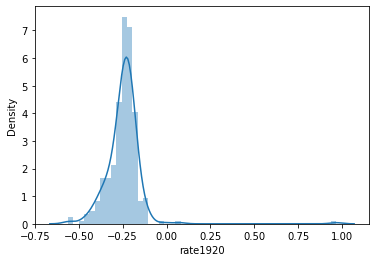

In [ ]:
sns.distplot(sub_info['rate1920'])

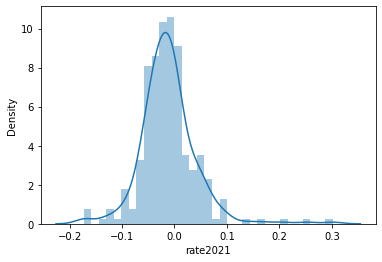

In [ ]:
sns.distplot(sub_info['rate2021'])

In [ ]:
#서울시 지도
seoul = gpd.read_file(point_path + 'seoul/bnd_sigungu_11_2020_2020_2Q.shp', encoding = 'cp949')

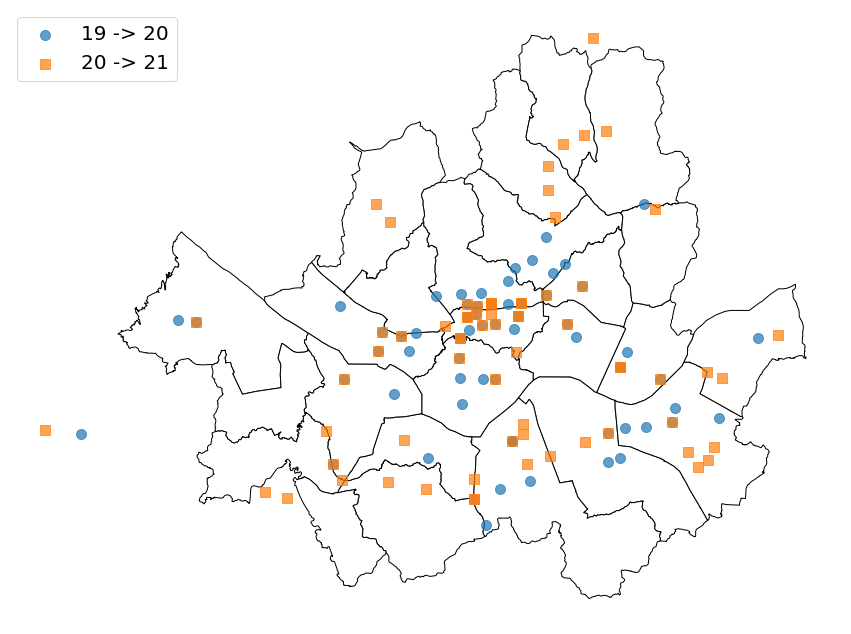

In [ ]:
# 감소폭이 큰 경우: 1사분위 수 안쪽
c1 = df_merge[df_merge['rate1920'] <  -0.279826]
c2 = df_merge[df_merge['rate2021'] <  -0.040411]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

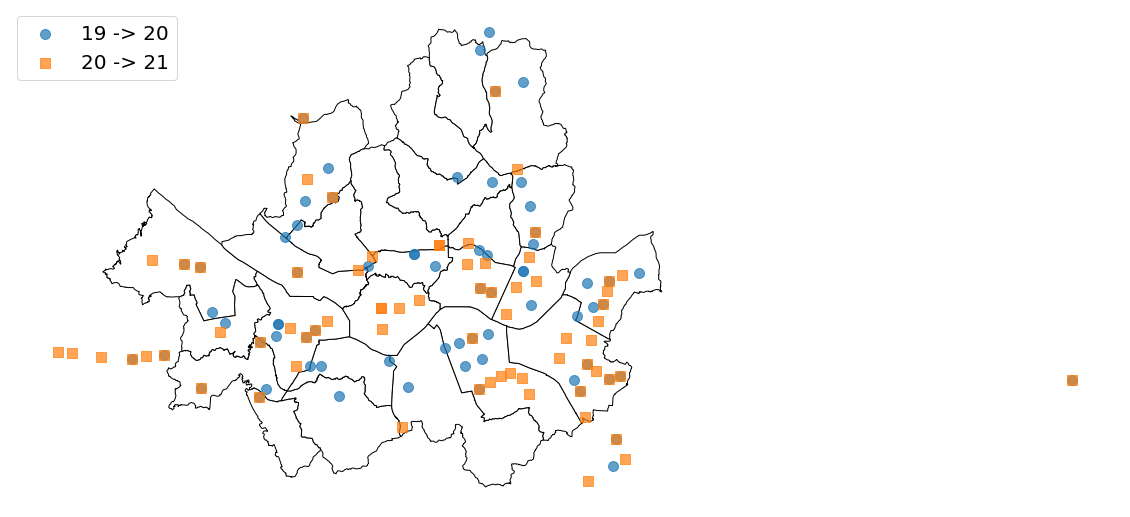

In [ ]:
# 감소폭이 작거나 증가한 경우: 3사분위 수 바깥쪽
c1 = df_merge[df_merge['rate1920'] >  -0.205016]
c2 = df_merge[df_merge['rate2021'] >  0.007711]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(20, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

##### 버스

In [ ]:
# 버스 정류장 좌표
bus_point = pd.read_csv(point_path + '버스/서울시버스정류소좌표데이터(2021.01.14.).csv', encoding = 'cp949')

In [ ]:
bus_point

,표준ID,ARS-ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987786,37.569764
1,100000002,1002,창경궁.서울대학교병원,126.996520,37.579179
2,100000003,1003,명륜3가.성대입구,126.998290,37.582709
3,100000004,1004,종로2가.삼일교,126.987507,37.568582
4,100000005,1005,혜화동로터리.여운형활동터,127.001694,37.586230
...,...,...,...,...,...
10916,124000334,25995,우성아파트,127.139326,37.550442
10917,124000333,25996,우성아파트,127.140052,37.550620
10918,124000332,25997,조일약국,127.123477,37.533686
10919,124000331,25998,성내시장,127.125410,37.536199


In [ ]:
# 데이터 불러오기
busday2019 = pd.read_csv(default_path + '3. 버스/버스 일별 2019.csv', encoding='cp949')
busday2020 = pd.read_csv(default_path + '3. 버스/버스 일별 2020.csv', encoding='cp949')
busday2021 = pd.read_csv(default_path + '3. 버스/버스 일별 2021.csv', encoding='cp949')

In [ ]:
busday2019

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,2019-01-01,100,100번(하계동~용산구청),11428,한성여객종점,10,0,20190104
1,2019-01-01,100,100번(하계동~용산구청),11387,노원평생학습관,5,0,20190104
2,2019-01-01,100,100번(하계동~용산구청),11373,중계역,27,1,20190104
3,2019-01-01,100,100번(하계동~용산구청),11381,중계목화아파트4단지,110,12,20190104
4,2019-01-01,100,100번(하계동~용산구청),11311,인덕대학,87,76,20190104
...,...,...,...,...,...,...,...,...
11656304,2019-10-31,서대문03,서대문03(홍은2동주민센터~신촌역),13891,홍은2동주민센터,8,20,20191103
11656305,2019-10-31,7726,7726번(덕은동~모래내삼거리),13002,북가좌동삼거리,40,26,20191103
11656306,2019-10-31,서대문11,서대문11(홍은동국민주택~봉원사입구),13897,호박골다리,13,238,20191103
11656307,2019-10-31,761,761번(진관차고지~영등포역),19122,신화병원,108,82,20191103


In [ ]:
# 승차 자료만 사용
ride_bus2019 = busday2019.loc[:, ['버스정류장ARS번호', '승차총승객수']]
ride_bus2020 = busday2020.loc[:, ['버스정류장ARS번호', '승차총승객수']]
ride_bus2021 = busday2021.loc[:, ['버스정류장ARS번호', '승차총승객수']]

In [ ]:
# groupby 사용 -> 정류장별 합계 구하기
gb_bus2019 = ride_bus2019.groupby(by = ['버스정류장ARS번호'], as_index = False).sum()
gb_bus2020 = ride_bus2020.groupby(by = ['버스정류장ARS번호'], as_index = False).sum()
gb_bus2021 = ride_bus2021.groupby(by = ['버스정류장ARS번호'], as_index = False).sum()

In [ ]:
bus_bypoint_2019 = pd.DataFrame({'버스정류장ARS번호' : gb_bus2019['버스정류장ARS번호'],'19합계' : gb_bus2019.sum(axis = 1, numeric_only=True)})
bus_bypoint_2020 = pd.DataFrame({'버스정류장ARS번호' : gb_bus2020['버스정류장ARS번호'],'20합계' : gb_bus2020.sum(axis = 1, numeric_only=True)})
bus_bypoint_2021 = pd.DataFrame({'버스정류장ARS번호' : gb_bus2021['버스정류장ARS번호'],'21합계' : gb_bus2021.sum(axis = 1, numeric_only=True)})

In [ ]:
print(len(bus_bypoint_2019))
print(len(bus_bypoint_2020))
print(len(bus_bypoint_2021))
# 2021년의 정류장 개수가 가장 작음, 2021년 기준 존재하는 정류장만 표시

12824
12831
12758


In [ ]:
coor_df = bus_point[['Y좌표','X좌표']]

In [ ]:
# 좌표계 변환
epsg5179= Proj(init="epsg:5179")
wgs84=Proj(init='epsg:4326')

In [ ]:
def convert_coor(df):
  for i in range(len(df)):
    df.iloc[i] = transform(wgs84,epsg5179, coor_df.iloc[i,1], coor_df.iloc[i,0])
  return df.values.tolist()

In [ ]:
coor_list = convert_coor(coor_df)

In [ ]:
def make_point(coor_list):
    point_list = []
    for i in range(len(coor_list)):
        coor = coor_list[i]
        point = geo.Point(coor)
        point_list.append(point)
    
    return point_list

In [ ]:
bus_info = gpd.GeoDataFrame({'버스정류장ARS번호' : bus_point['ARS-ID'], 'geometry' : make_point(coor_list)})
bus_info

,버스정류장ARS번호,geometry
0,1001,POINT (954767.380 1952389.467)
1,1002,POINT (955544.265 1953429.815)
2,1003,POINT (955702.644 1953820.611)
3,1004,POINT (954742.031 1952258.473)
4,1005,POINT (956005.283 1954209.668)
...,...,...
10916,25995,POINT (968141.377 1950183.629)
10917,25996,POINT (968205.575 1950203.081)
10918,25997,POINT (966733.992 1948330.143)
10919,25998,POINT (966905.874 1948608.225)


In [ ]:
bus_bypoint_2019 = bus_bypoint_2019.drop(bus_bypoint_2019.index[-1])
bus_bypoint_2019['버스정류장ARS번호'] = pd.to_numeric(bus_bypoint_2019['버스정류장ARS번호'])
bus_bypoint_2020 = bus_bypoint_2020.drop(bus_bypoint_2020.index[-1])
bus_bypoint_2020['버스정류장ARS번호'] = pd.to_numeric(bus_bypoint_2020['버스정류장ARS번호'])
bus_bypoint_2021 = bus_bypoint_2021.drop(bus_bypoint_2021.index[-1])
bus_bypoint_2021['버스정류장ARS번호'] = pd.to_numeric(bus_bypoint_2021['버스정류장ARS번호'])

In [ ]:
# 3년 내내 있었던 정류장만 표시하기 위해 merge
dfs = [bus_info, bus_bypoint_2019, bus_bypoint_2020, bus_bypoint_2021]
df_merge = reduce(lambda left, right: pd.merge(left, right, on='버스정류장ARS번호'), dfs)
df_merge

,버스정류장ARS번호,geometry,19합계,20합계,21합계
0,1001,POINT (954767.380 1952389.467),142131,124773,117544
1,1002,POINT (955544.265 1953429.815),773085,572846,563421
2,1003,POINT (955702.644 1953820.611),1284981,853744,798017
3,1004,POINT (954742.031 1952258.473),231972,182750,157696
4,1005,POINT (956005.283 1954209.668),513051,391061,380518
...,...,...,...,...,...
10502,25752,POINT (971367.603 1951808.722),1352,1043,1618
10503,25753,POINT (971115.346 1952136.614),1915,1430,2566
10504,25758,POINT (971080.983 1950914.827),16105,9077,8907
10505,25760,POINT (970770.476 1953069.929),416,412,236


In [ ]:
# 이용률 변화 구하기
df_merge['rate1920']= (df_merge['20합계']- df_merge['19합계'])/df_merge['19합계']
df_merge['rate2021']= (df_merge['21합계']- df_merge['20합계'])/df_merge['20합계']

In [ ]:
bus_info = df_merge.drop(['19합계', '20합계', '21합계'], axis = 1)
bus_info

,버스정류장ARS번호,geometry,rate1920,rate2021
0,1001,POINT (954767.380 1952389.467),-0.122127,-0.057937
1,1002,POINT (955544.265 1953429.815),-0.259013,-0.016453
2,1003,POINT (955702.644 1953820.611),-0.335598,-0.065274
3,1004,POINT (954742.031 1952258.473),-0.212189,-0.137094
4,1005,POINT (956005.283 1954209.668),-0.237774,-0.026960
...,...,...,...,...
10502,25752,POINT (971367.603 1951808.722),-0.228550,0.551294
10503,25753,POINT (971115.346 1952136.614),-0.253264,0.794406
10504,25758,POINT (971080.983 1950914.827),-0.436386,-0.018729
10505,25760,POINT (970770.476 1953069.929),-0.009615,-0.427184


In [ ]:
#서울시 지도
seoul = gpd.read_file(point_path + 'seoul/bnd_sigungu_11_2020_2020_2Q.shp', encoding = 'cp949')

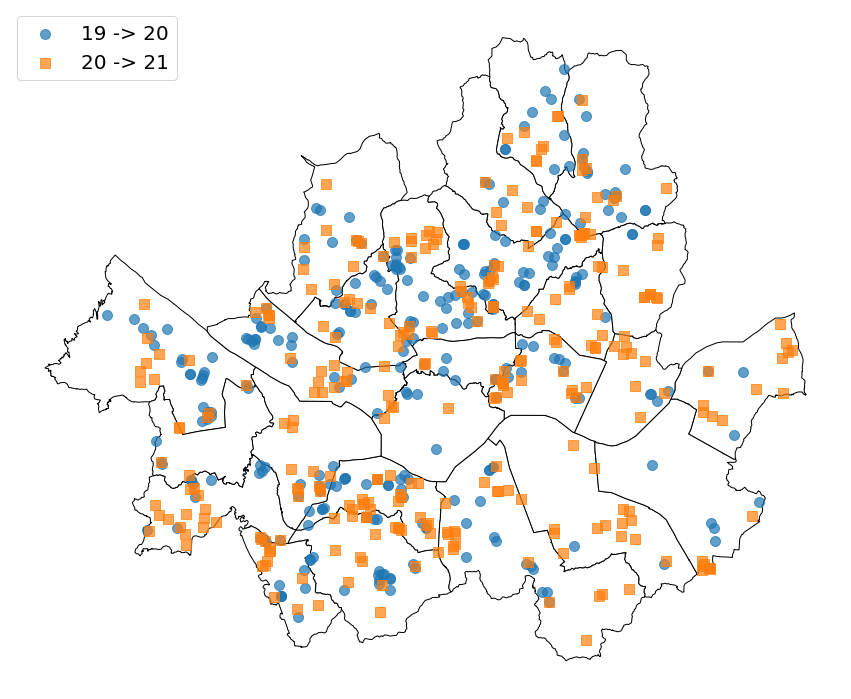

In [ ]:
# 감소폭이 큰 경우 (하위 300개)
c1 = bus_info[bus_info['rate1920'] <  bus_info['rate1920'].sort_values(ascending=True).iloc[300]]
c2 = bus_info[bus_info['rate2021'] <  bus_info['rate2021'].sort_values(ascending=True).iloc[300]]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

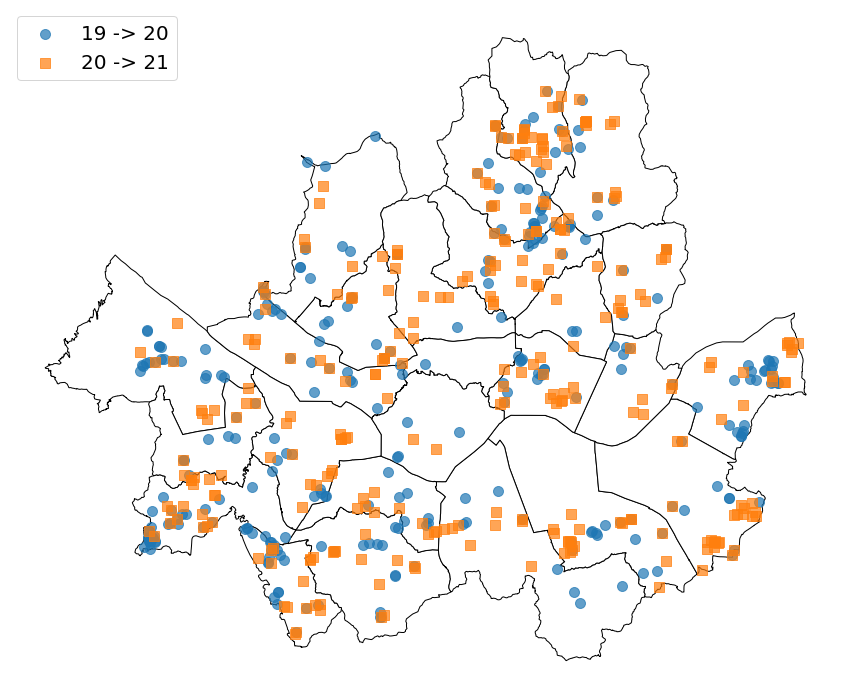

In [ ]:
# 감소폭이 작거나 증가한 경우 (상위 300개)
c1 = bus_info[bus_info['rate1920'] > bus_info['rate1920'].sort_values(ascending=False).iloc[300]]
c2 = bus_info[bus_info['rate2021'] > bus_info['rate2021'].sort_values(ascending=False).iloc[300]]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

##### 공공자전거

In [ ]:
# 대여소 좌표
bic_point = pd.read_csv(point_path + '공공자전거/공공자전거 대여소 정보(21.01.31 기준).csv', encoding = 'cp949')

In [ ]:
bic_point

,대여소\n번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치\n시기
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07
3,304,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26
4,305,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07
...,...,...,...,...,...,...,...
2149,1085,래미안 솔베뉴(고덕로),강동구,양재대로1650,37.554569,127.145874,2020-01-13
2150,1086,래미안 솔베뉴(구천면로),강동구,양재대로1650,37.550598,127.145454,2020-01-10
2151,1088,풍납사거리(강동),강동구,성내동451-3,37.528122,127.119522,2020-01-14
2152,1089,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13


In [ ]:
# 데이터 불러오기
bic2019 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2019.csv', encoding='utf-8')
bic2020 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2020.csv', encoding='utf-8')
bic2021 = pd.read_csv(default_path + '4. 공공자전거/대여이력 2021.csv', encoding='utf-8')

In [ ]:
# groupby 사용 -> 대여소별 합계 구하기
bic_byday_2019 = bic2019.groupby(['대여소번호']).size()
bic_byday_2020 = bic2020.groupby(['대여소번호']).size()
bic_byday_2021 = bic2021.groupby(['대여소번호']).size()

In [ ]:
bic_bypoint_2019 = pd.DataFrame(bic_byday_2019, columns = ['19합계'])
bic_bypoint_2020 = pd.DataFrame(bic_byday_2020, columns = ['20합계'])
bic_bypoint_2021 = pd.DataFrame(bic_byday_2021, columns = ['21합계'])

In [ ]:
print(len(bic_bypoint_2019))
print(len(bic_bypoint_2020))
print(len(bic_bypoint_2021))
# 2019년의 대여소 개수가 가장 작음, 2019년 기준 존재하는 대여소만 표시

1552
2086
2494


In [ ]:
coor_df = bic_point[['위도','경도']]

In [ ]:
# 좌표계 변환
epsg5179= Proj(init="epsg:5179")
wgs84=Proj(init='epsg:4326')

In [ ]:
def convert_coor(df):
  for i in range(len(df)):
    df.iloc[i] = transform(wgs84,epsg5179, coor_df.iloc[i,1], coor_df.iloc[i,0])
  return df.values.tolist()

In [ ]:
coor_list = convert_coor(coor_df)

In [ ]:
def make_point(coor_list):
    point_list = []
    for i in range(len(coor_list)):
        coor = coor_list[i]
        point = geo.Point(coor)
        point_list.append(point)
    
    return point_list

In [ ]:
bic_info = gpd.GeoDataFrame({'대여소번호' : bic_point['대여소\n번호'], 'geometry' : make_point(coor_list)})
bic_info

,대여소번호,geometry
0,301,POINT (953328.606 1953066.438)
1,302,POINT (953559.080 1953082.120)
2,303,POINT (953609.735 1952618.404)
3,304,POINT (953867.271 1952655.024)
4,305,POINT (953936.262 1952706.675)
...,...,...
2149,1085,POINT (968721.518 1950639.296)
2150,1086,POINT (968682.759 1950198.876)
2151,1088,POINT (966382.074 1947714.253)
2152,1089,POINT (968796.814 1951308.127)


In [ ]:
# 3년 내내 있었던 대여소만 표시하기 위해 merge
dfs = [bic_info, bic_bypoint_2019, bic_bypoint_2020, bic_bypoint_2021]
df_merge = reduce(lambda left, right: pd.merge(left, right, on='대여소번호'), dfs)
df_merge

,대여소번호,geometry,19합계,20합계,21합계
0,301,POINT (953328.606 1953066.438),4449,5140,5807
1,302,POINT (953559.080 1953082.120),7164,8327,9290
2,303,POINT (953609.735 1952618.404),5230,5745,7430
3,304,POINT (953867.271 1952655.024),3292,3901,1254
4,305,POINT (953936.262 1952706.675),5568,5871,7753
...,...,...,...,...,...
1507,1059,POINT (967467.054 1948825.936),4291,6352,4592
1508,1060,POINT (967548.048 1949544.326),2141,3865,3629
1509,1061,POINT (967724.289 1949795.375),2722,4380,4790
1510,1062,POINT (970199.326 1950246.660),728,1698,1277


In [ ]:
# 이용률 변화 구하기
df_merge['rate1920']= (df_merge['20합계']- df_merge['19합계'])/df_merge['19합계']
df_merge['rate2021']= (df_merge['21합계']- df_merge['20합계'])/df_merge['20합계']

In [ ]:
bic_info = df_merge.drop(['19합계', '20합계', '21합계'], axis = 1)
bic_info

,대여소번호,geometry,rate1920,rate2021
0,301,POINT (953328.606 1953066.438),0.155316,0.129767
1,302,POINT (953559.080 1953082.120),0.162339,0.115648
2,303,POINT (953609.735 1952618.404),0.098470,0.293299
3,304,POINT (953867.271 1952655.024),0.184994,-0.678544
4,305,POINT (953936.262 1952706.675),0.054418,0.320559
...,...,...,...,...
1507,1059,POINT (967467.054 1948825.936),0.480308,-0.277078
1508,1060,POINT (967548.048 1949544.326),0.805231,-0.061061
1509,1061,POINT (967724.289 1949795.375),0.609111,0.093607
1510,1062,POINT (970199.326 1950246.660),1.332418,-0.247939


In [ ]:
bic_info = df_merge.drop(['19합계', '20합계', '21합계'], axis = 1)
bic_info

,대여소번호,geometry,rate1920,rate2021
0,301,POINT (953328.606 1953066.438),0.155316,0.129767
1,302,POINT (953559.080 1953082.120),0.162339,0.115648
2,303,POINT (953609.735 1952618.404),0.098470,0.293299
3,304,POINT (953867.271 1952655.024),0.184994,-0.678544
4,305,POINT (953936.262 1952706.675),0.054418,0.320559
...,...,...,...,...
1507,1059,POINT (967467.054 1948825.936),0.480308,-0.277078
1508,1060,POINT (967548.048 1949544.326),0.805231,-0.061061
1509,1061,POINT (967724.289 1949795.375),0.609111,0.093607
1510,1062,POINT (970199.326 1950246.660),1.332418,-0.247939


In [ ]:
bic_info['rate1920'].describe()

count    1512.000000
mean        0.446681
std         0.548219
min        -0.913921
25%         0.176141
50%         0.382956
75%         0.651474
max        11.239382
Name: rate1920, dtype: float64

In [ ]:
bic_info['rate2021'].describe()

count    1512.000000
mean        0.250883
std         8.544823
min        -0.992537
25%        -0.128651
50%         0.026226
75%         0.176434
max       332.000000
Name: rate2021, dtype: float64

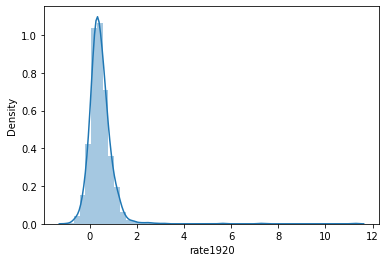

In [ ]:
sns.distplot(bic_info['rate1920'])

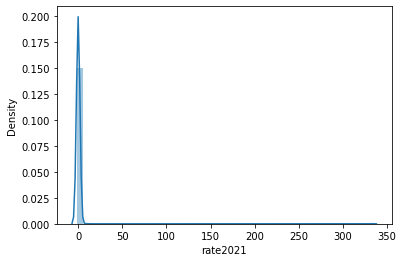

In [ ]:
sns.distplot(bic_info['rate2021'])

In [ ]:
#서울시 지도
seoul = gpd.read_file(point_path + 'seoul/bnd_sigungu_11_2020_2020_2Q.shp', encoding = 'cp949')

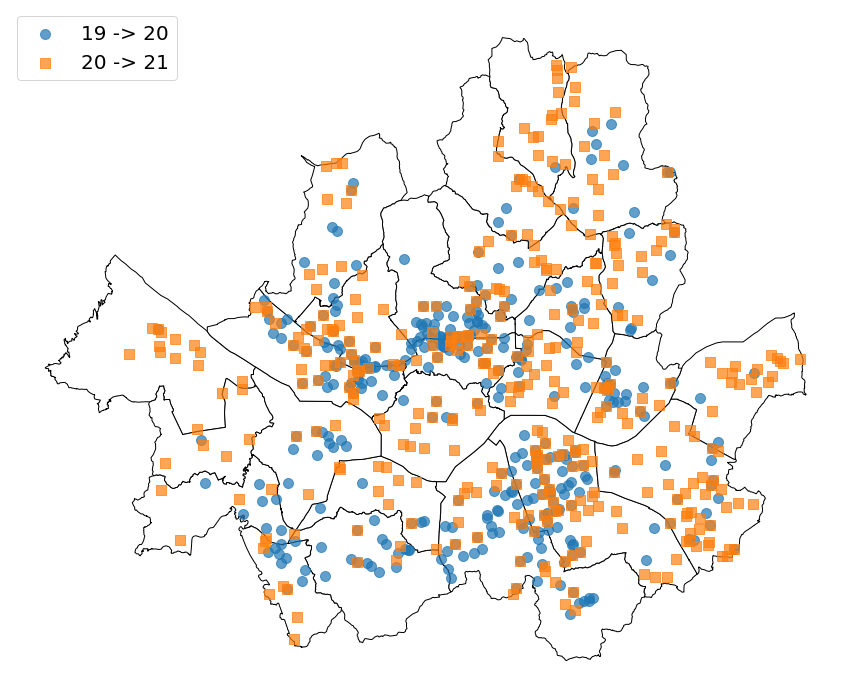

In [ ]:
# 증가폭이 작은 경우: 1사분위 수 안쪽
c1 = bic_info[bic_info['rate1920'] <  0.176141]
c2 = bic_info[bic_info['rate2021'] <  -0.128651]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')

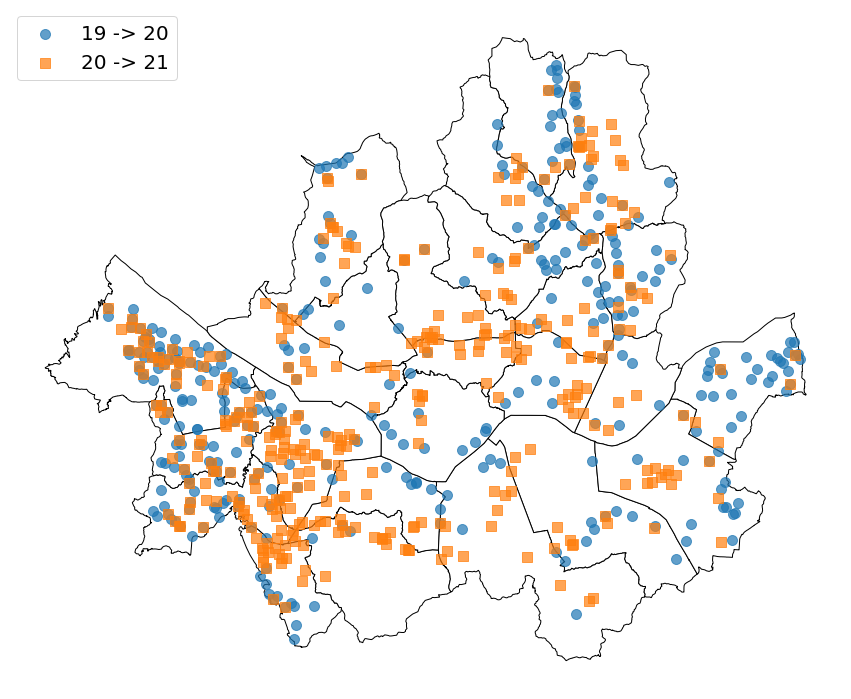

In [ ]:
# 증가폭이 큰 경우: 3사분위 수 바깥쪽
c1 = bic_info[bic_info['rate1920'] >  0.651474]
c2 = bic_info[bic_info['rate2021'] >  0.176434]
ax = seoul.plot(color='white', edgecolor = 'black', figsize=(15, 15))
ax.axis('off')
ax1 = c1.plot(ax = ax, markersize = 100, alpha = 0.7, marker = 'o', label = '19 -> 20')
ax2 = c2.plot(ax = ax1, markersize = 100, alpha = 0.7, marker = 's', label = '20 -> 21')
plt.legend(fontsize = 20, loc = 'upper left')